<a href="https://colab.research.google.com/github/preetmodi/Credit-Risk-Analytics/blob/main/Woe_calculation_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=1n4I7CultXDAYZZyPKA4fRCDcJgANwJnne-PgKNbIxw'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Cannot retrieve auth tokens.
Failure("Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.

In [3]:
# pip install scorecardpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/CBravoR/scorecardpy to /tmp/pip-req-build-w7lbp8te
  Running command git clone --filter=blob:none --quiet https://github.com/CBravoR/scorecardpy /tmp/pip-req-build-w7lbp8te
  Resolved https://github.com/CBravoR/scorecardpy to commit 03ec28470391e5c950580ad9ac4877ca33f05fce
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.3-py3-none-any.whl size=59549 sha256=980ccb376dc325375b8b60d0159cf0511549c234d1f132839b8f0ebf3f685a38
  Stored in directory: /tmp/pip-ephem-wheel-cache-lvyx2hie/wheels/61/36/7f/76fa329f36d896910f2251f5cfd54094c722e088b633e47f6f
Successfully built scorecardpy


In [3]:
!pip install git+https://github.com/CBravoR/scorecardpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scorecardpy as sc
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/CBravoR/scorecardpy to /tmp/pip-req-build-it60ia4b
  Running command git clone --filter=blob:none --quiet https://github.com/CBravoR/scorecardpy /tmp/pip-req-build-it60ia4b
  Resolved https://github.com/CBravoR/scorecardpy to commit 03ec28470391e5c950580ad9ac4877ca33f05fce
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.3-py3-none-any.whl size=59549 sha256=bab1968c881e99fffd14d99279cd07c321cf52e02041295160c5c7c6fb8dcb89
  Stored in directory: /tmp/pip-ephem-wheel-cache-l91e1rjv/wheels/61/36/7f/76fa329f36d896910f2251f5cfd54094c722e088b633e47f6f
Successfully built scorecardpy


In [4]:
%cd /content/gdrive/My Drive/Data/
# df = pd.read_csv("transformed_data.csv", low_memory=False, index_col=0)

/content/gdrive/My Drive/Data


In [6]:
train = pd.read_csv("train_mean.csv", low_memory=False, index_col=0)
test = pd.read_csv("Test.csv", low_memory=False, index_col=0)


In [10]:
train.Default = train.Default.astype(float)
train.bank_dlq = train.bank_dlq.astype(float)
train.il_acc = train.il_acc.astype(float)
train.dtypes

id                             int64
loan_amnt                    float64
funded_amnt                  float64
funded_amnt_inv              float64
term                          object
                              ...   
Default                      float64
bank_dlq                     float64
il_acc                       float64
payment_history              float64
collateral_coverage_ratio    float64
Length: 75, dtype: object

In [11]:
train_mid_19 = train.iloc[:, 19:38]
train_mid_19["Default"] = train["Default"]
train_mid_19.columns
train_mid_19.info()      

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896430 entries, 0 to 1280645
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   revol_util        896430 non-null  float64
 1   total_acc         896430 non-null  float64
 2   application_type  896430 non-null  object 
 3   annual_inc_joint  896430 non-null  float64
 4   dti_joint         896430 non-null  float64
 5   tot_coll_amt      896430 non-null  float64
 6   tot_cur_bal       896430 non-null  float64
 7   open_acc_6m       896430 non-null  float64
 8   open_act_il       896430 non-null  float64
 9   open_il_12m       896430 non-null  float64
 10  open_il_24m       896430 non-null  float64
 11  total_bal_il      896430 non-null  float64
 12  il_util           896430 non-null  float64
 13  open_rv_12m       896430 non-null  float64
 14  open_rv_24m       896430 non-null  float64
 15  max_bal_bc        896430 non-null  float64
 16  all_util          8

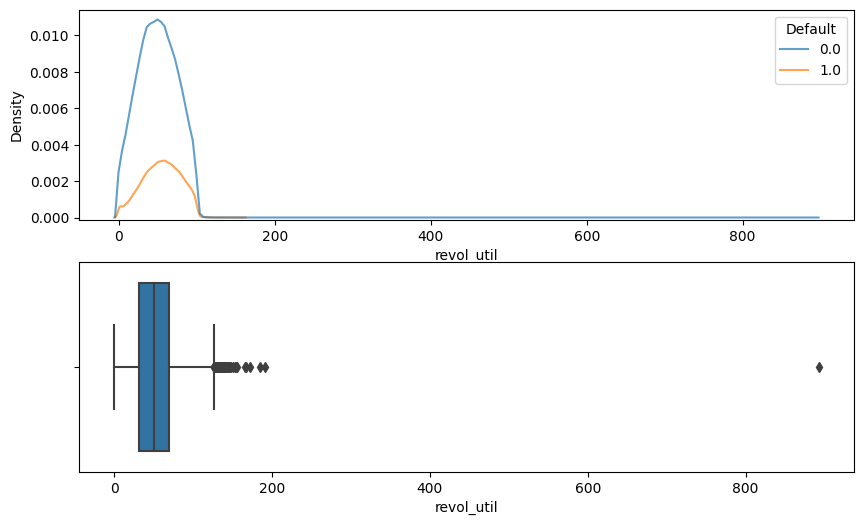

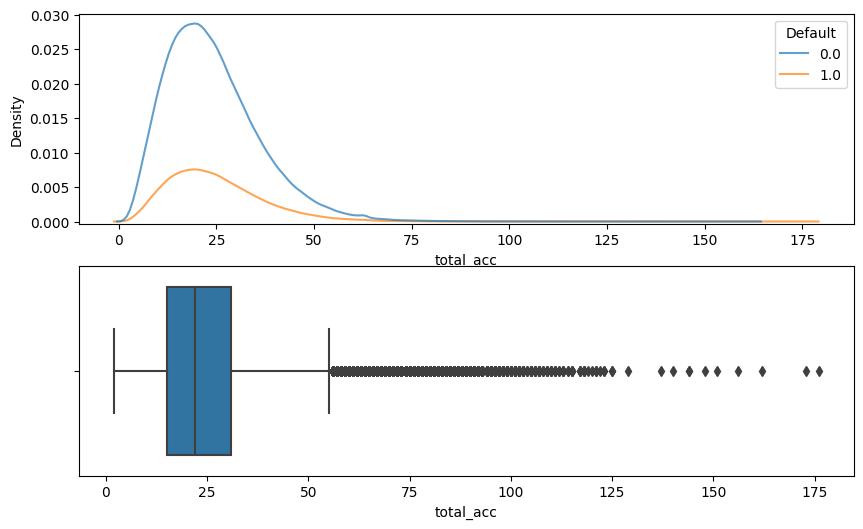

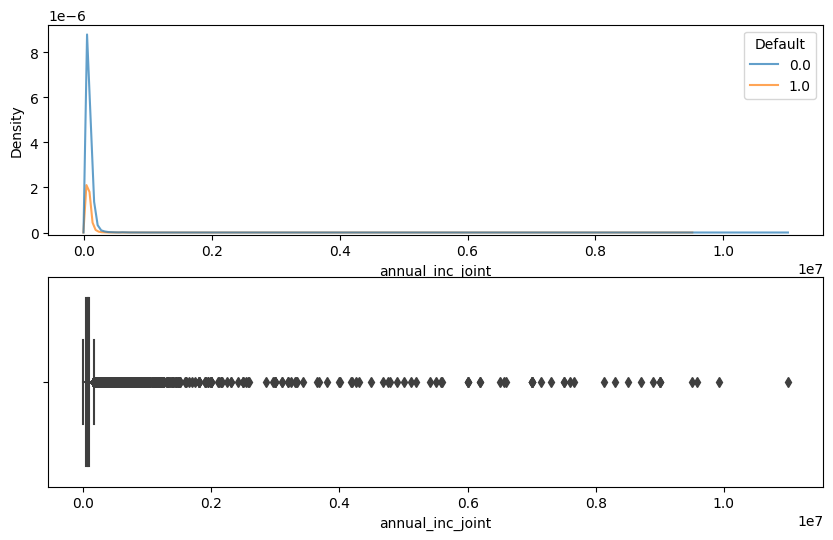

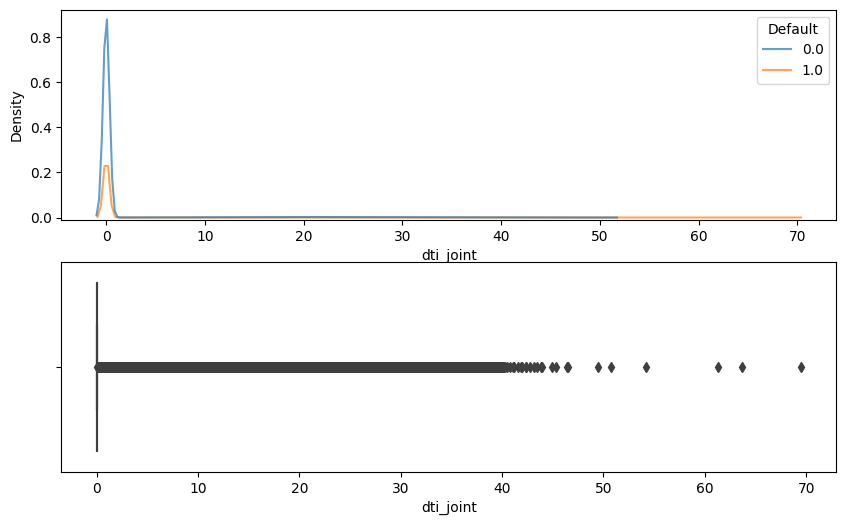

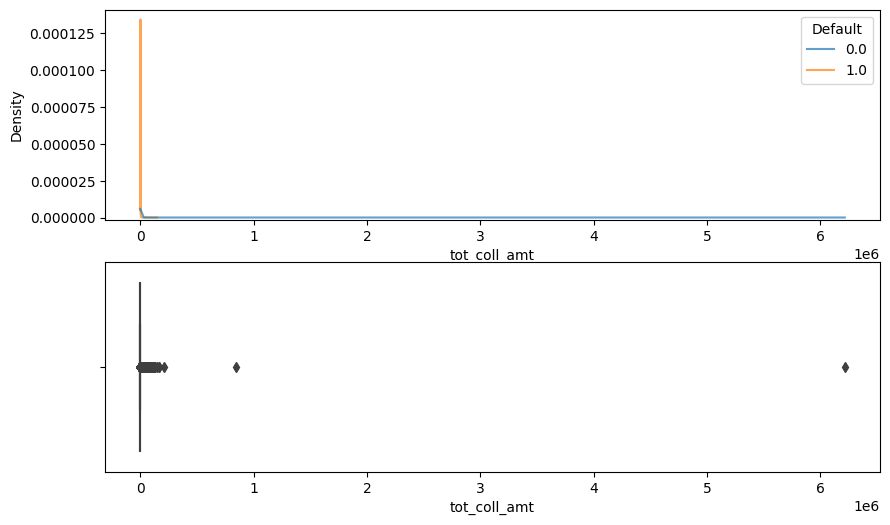

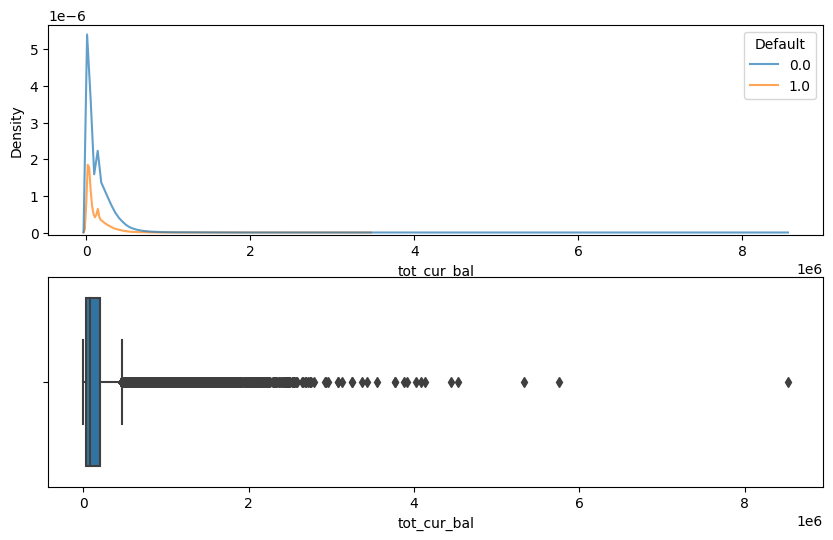

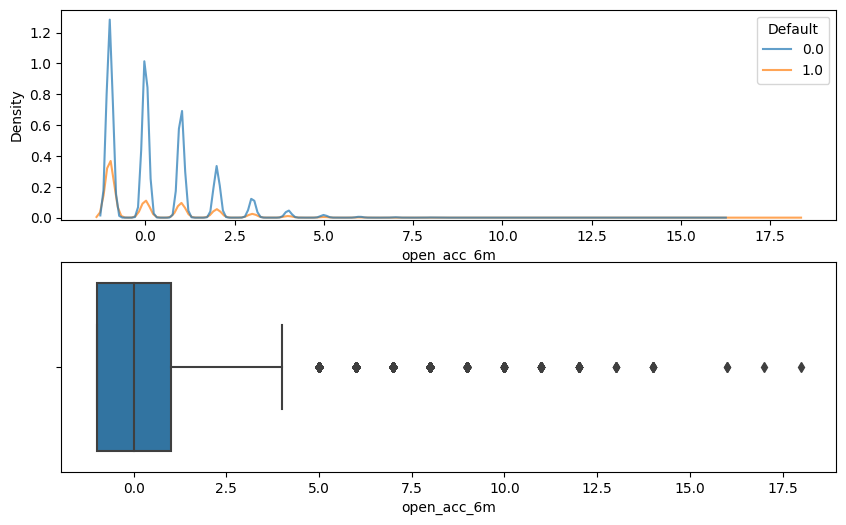

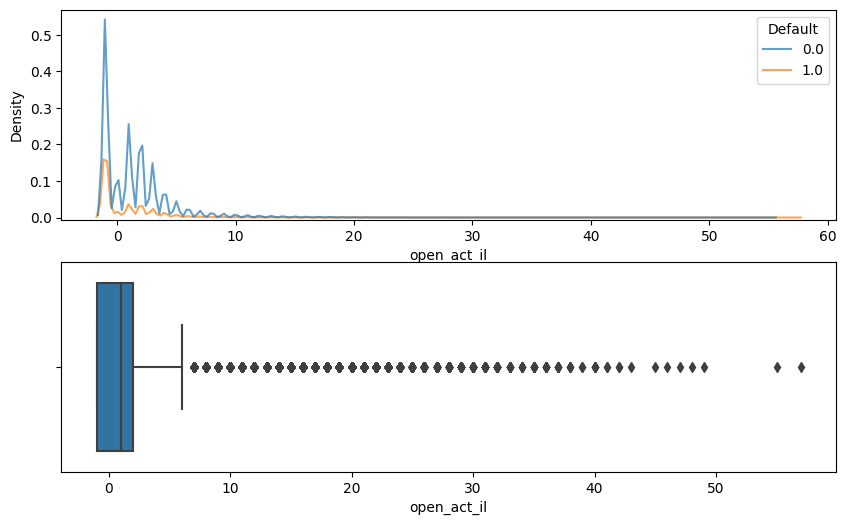

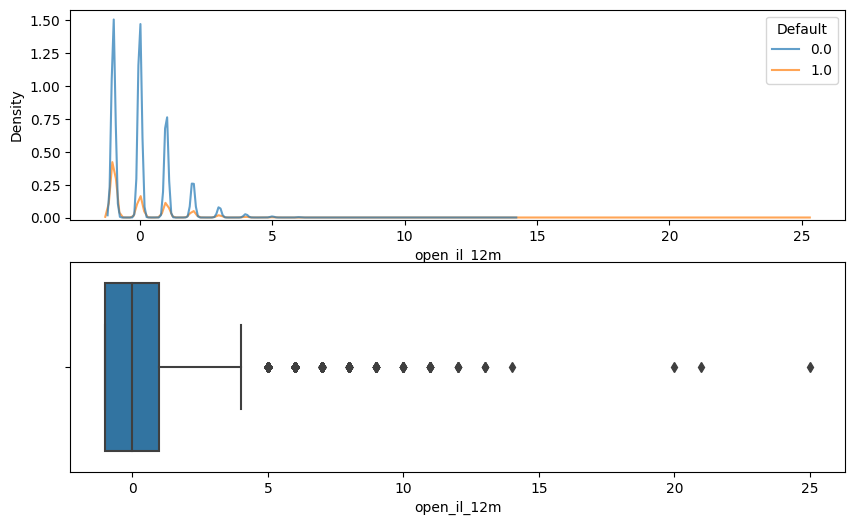

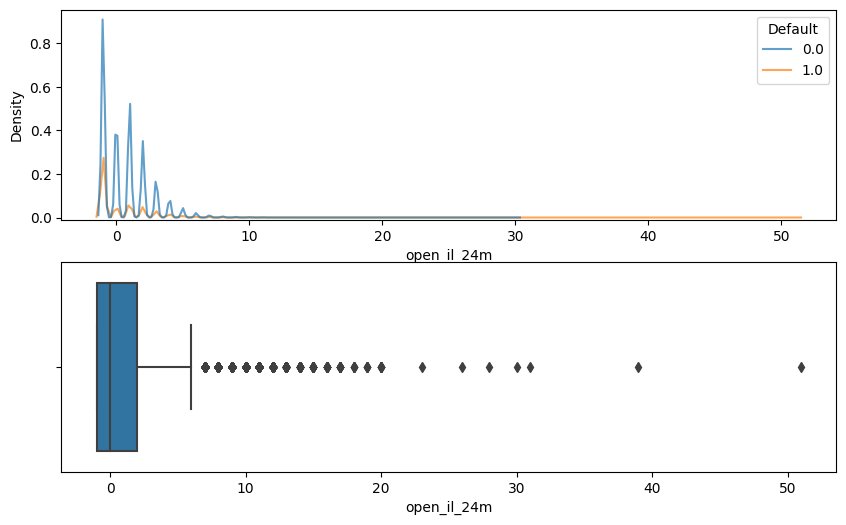

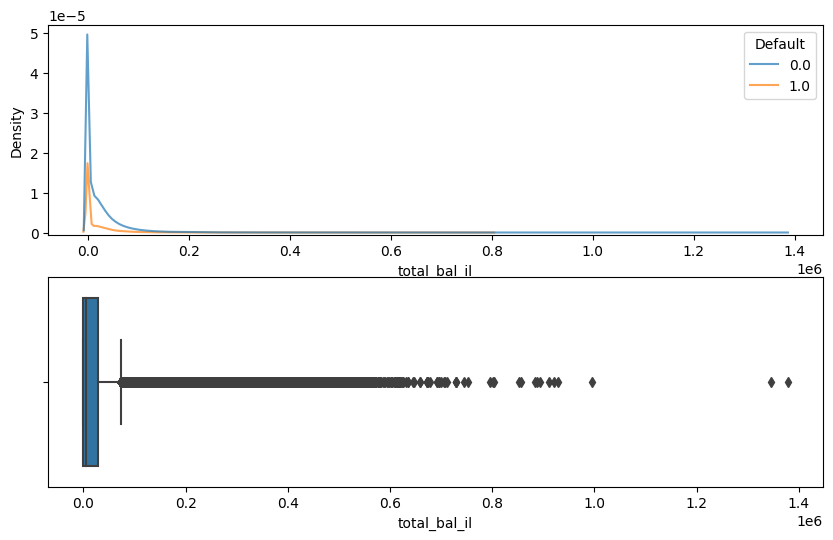

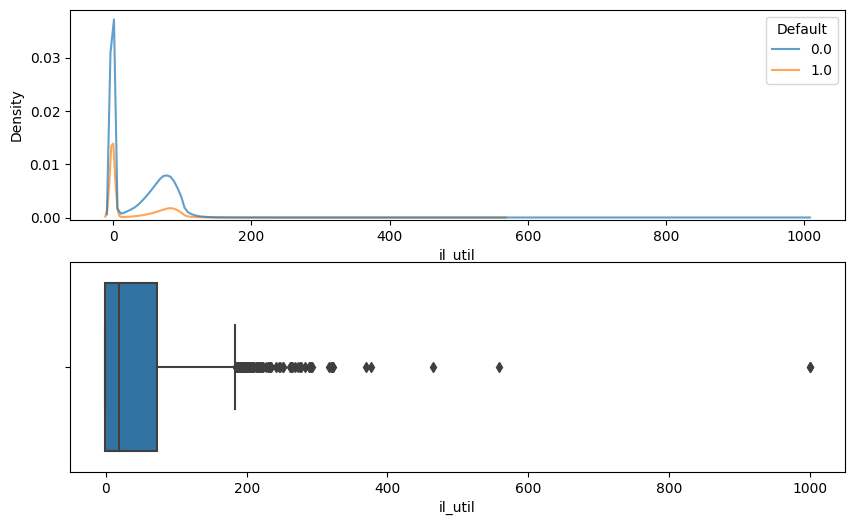

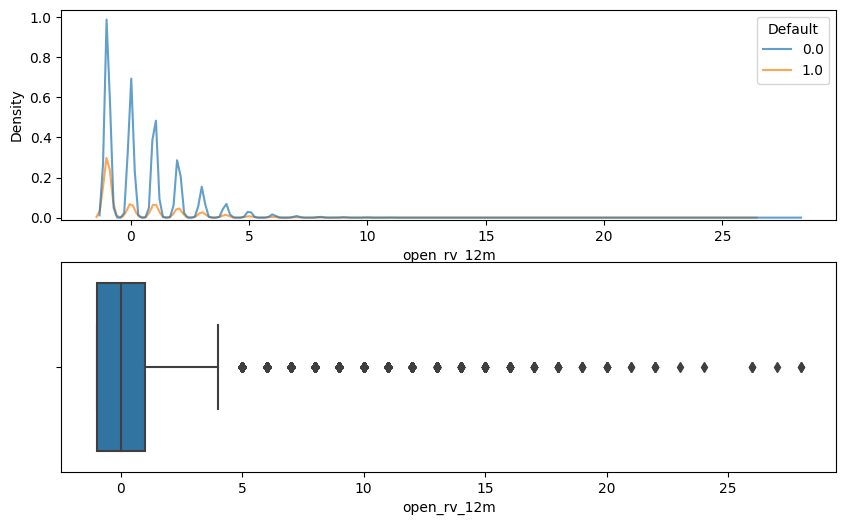

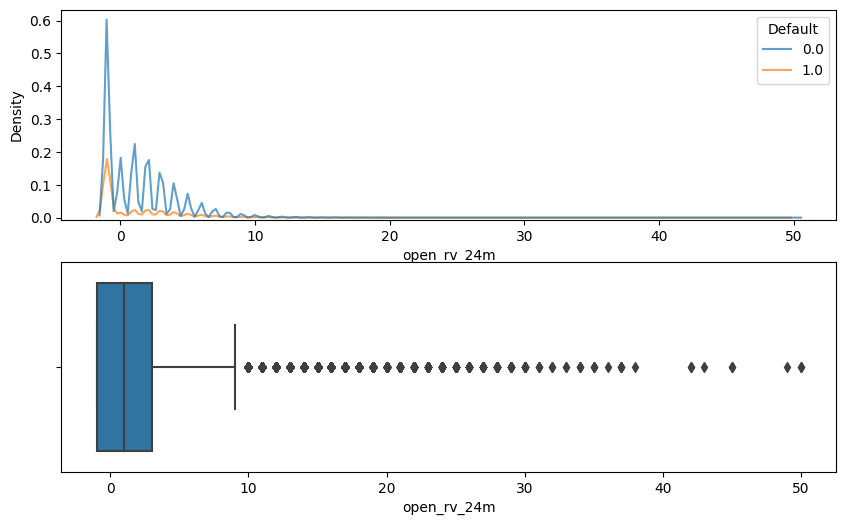

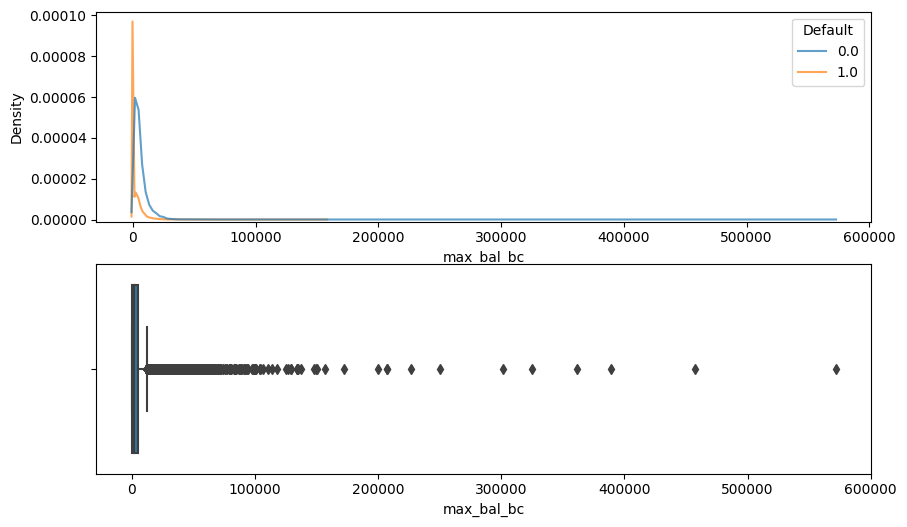

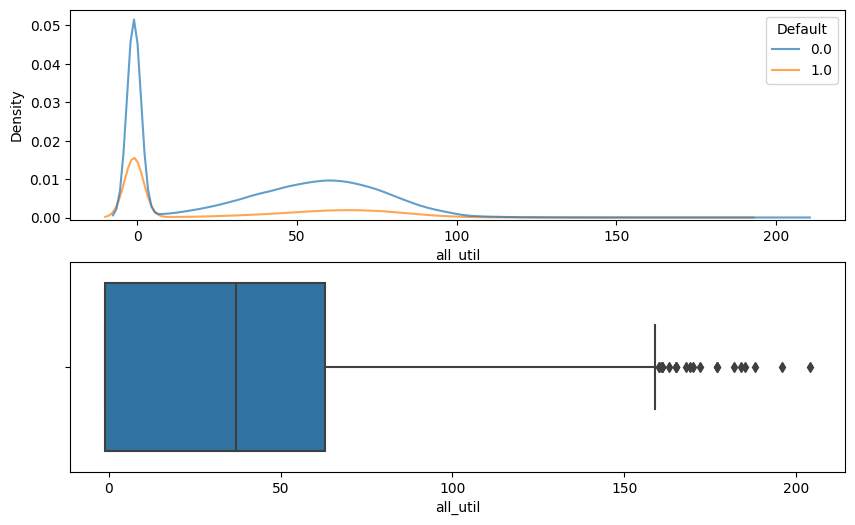

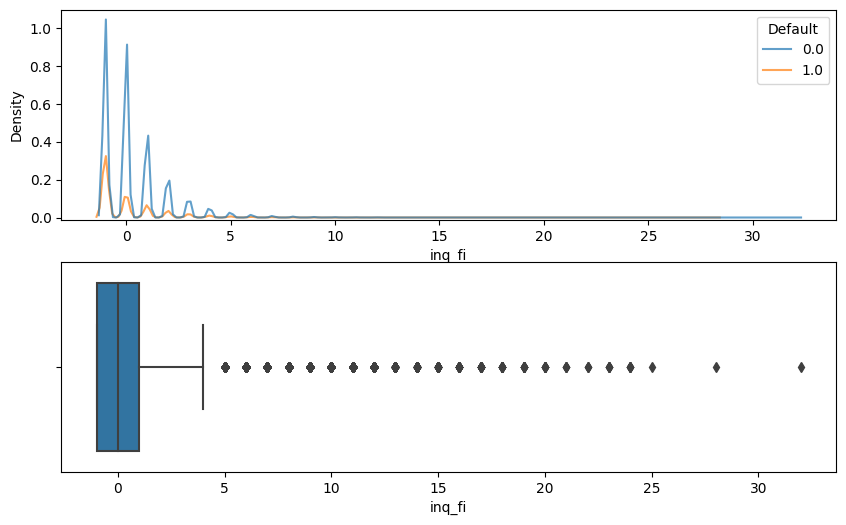

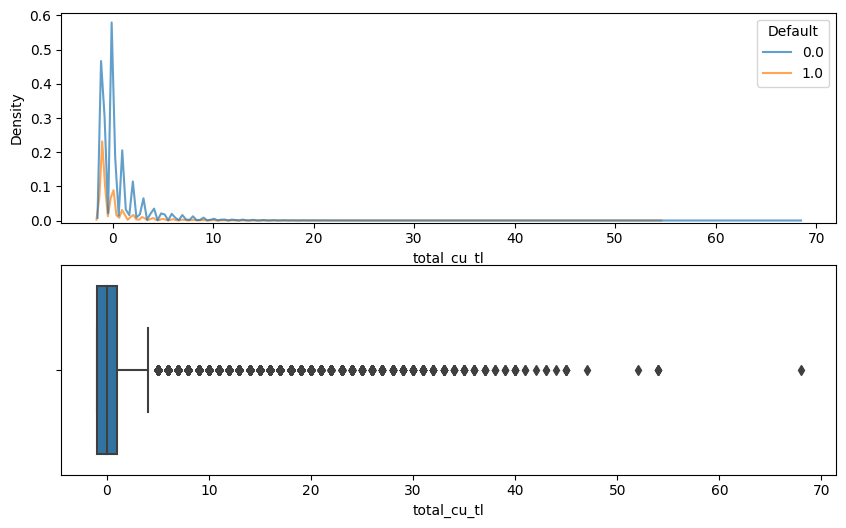

In [9]:
# sns.set_style("whitegrid")
num_list = []
for col_id in train_mid_19.columns[:-1]:
  if train_mid_19[col_id].dtype == "float64":
    num_list.append(col_id)
    fig, g = plt.subplots(2,1, figsize=(10,6))
    sns.kdeplot(data = train_mid_19, x = col_id, hue= "Default", alpha=0.7, ax=g[0])
    ymin, ymax = g[0].get_ylim()
    g[0].set_ylim(ymin=ymin-(ymax/100), ymax=ymax)
    sns.boxplot(data = train_mid_19, x = col_id,  ax=g[1])

In [10]:
train_mid_19.describe()

,revol_util,total_acc,annual_inc_joint,dti_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,Default
count,896430.000000,896430.000000,8.964300e+05,896430.000000,8.964300e+05,8.964300e+05,896430.000000,896430.000000,896430.000000,896430.000000,8.964300e+05,896430.000000,896430.000000,896430.000000,896430.000000,896430.000000,896430.000000,896430.000000,896430.000000
mean,50.792201,24.209806,8.042356e+04,0.988480,2.295102e+02,1.399103e+05,0.181103,1.284092,0.020833,0.563200,2.145965e+04,35.449988,0.399683,1.299192,3468.541615,34.264617,0.227984,0.498251,0.209742
std,24.669560,11.997335,7.718345e+04,4.613004,6.826729e+03,1.558122e+05,1.313637,2.979369,1.101891,1.773763,3.829902e+04,39.163330,1.642071,2.766258,5157.278210,32.859393,1.541823,2.406034,0.407125
min,0.000000,2.000000,2.400000e+03,0.000000,0.000000e+00,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,32.100000,15.000000,4.800000e+04,0.000000,0.000000e+00,2.968900e+04,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,50.800000,22.000000,6.760000e+04,0.000000,0.000000e+00,8.258100e+04,0.000000,1.000000,0.000000,0.000000,4.357000e+03,19.000000,0.000000,1.000000,1639.000000,37.000000,0.000000,0.000000,0.000000
75%,69.800000,31.000000,9.600000e+04,0.000000,0.000000e+00,2.040860e+05,1.000000,2.000000,1.000000,2.000000,2.932300e+04,73.000000,1.000000,3.000000,5160.000000,63.000000,1.000000,1.000000,0.000000
max,892.300000,176.000000,1.099920e+07,69.490000,6.214661e+06,8.524709e+06,18.000000,57.000000,25.000000,51.000000,1.378570e+06,1000.000000,28.000000,50.000000,571793.000000,204.000000,32.000000,68.000000,1.000000


In [5]:
def outlier_analysis(df_orig):
  df = df_orig.copy()
  df.loc[df["revol_util"]>200,"revol_util"] = 200
  df.loc[df["total_acc"]>125,"total_acc"] = 125
  df.loc[df["annual_inc_joint"]>500000,"annual_inc_joint"] = 500000
  df.loc[df["dti_joint"]>40,"dti_joint"] = 40
  df.loc[df["tot_coll_amt"]>500000,"tot_coll_amt"] = 500000
  df.loc[df["tot_cur_bal"]>1000000,"tot_cur_bal"] = 1000000
  df.loc[df["open_acc_6m"]>10,"open_acc_6m"] = 10
  df.loc[df["open_act_il"]>40,"open_act_il"] = 40
  df.loc[df["open_il_12m"]>10,"open_il_12m"] = 10
  df.loc[df["open_il_24m"]>20,"open_il_24m"] = 20
  df.loc[df["total_bal_il"]>800000,"total_bal_il"] = 800000
  df.loc[df["il_util"]>400,"il_util"] = 400
  df.loc[df["open_rv_12m"]>10,"open_rv_12m"] = 10
  df.loc[df["open_rv_24m"]>20,"open_rv_24m"] = 20
  df.loc[df["max_bal_bc"]>150000,"max_bal_bc"] = 150000
  df.loc[df["all_util"]>200,"all_util"] = 200
  df.loc[df["inq_fi"]>15,"inq_fi"] = 15 
  df.loc[df["total_cu_tl"]>40,"total_cu_tl"] = 40
  return df

train_mid_19_tr = outlier_analysis(train_mid_19)
train_mid_19_tr.describe()

NameError: ignored

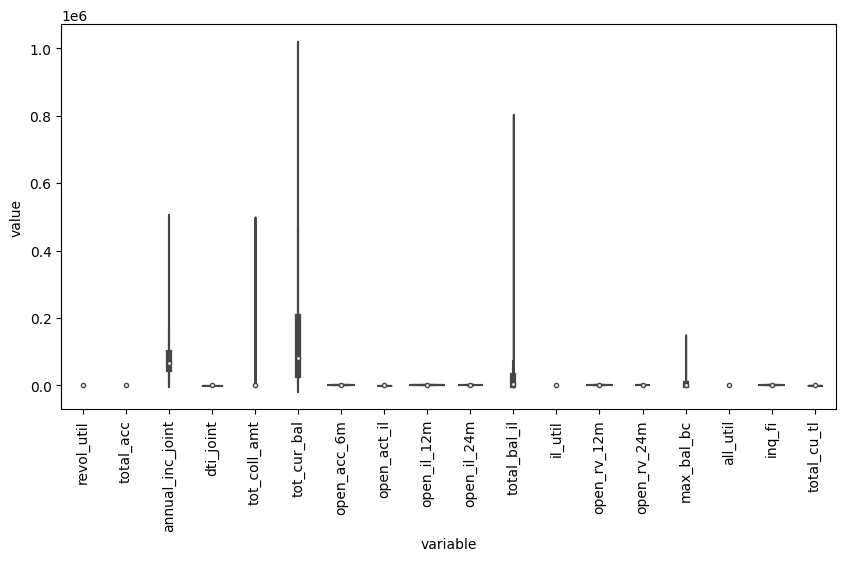

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(train_mid_19.loc[:,np.r_[num_list]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

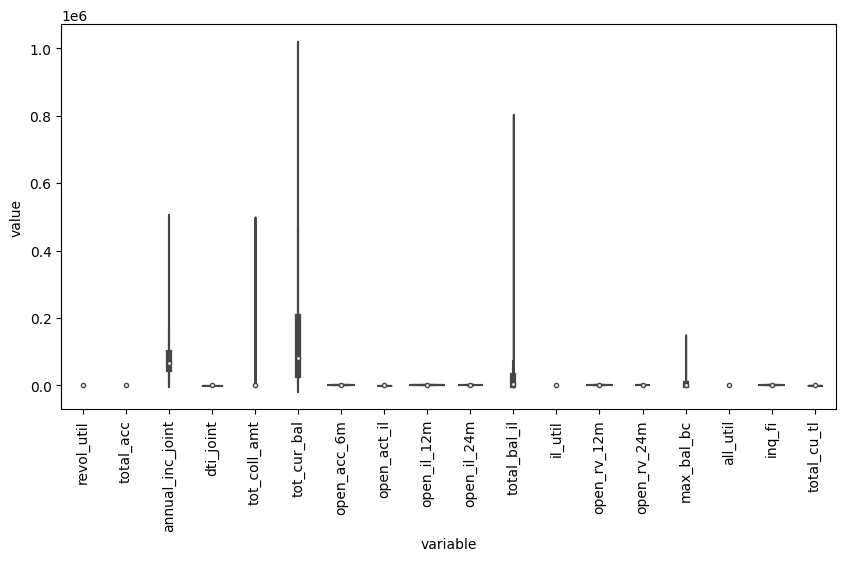

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(train_mid_19_tr.loc[:,np.r_[num_list]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [14]:
train_mid_19_tr.to_pickle('Mid19Clean.pkl')

In [7]:
train_mid_19_tr = pd.read_pickle('Mid19Clean.pkl')

In [8]:
train_mid_19_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896430 entries, 0 to 1280645
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   revol_util        896430 non-null  float64
 1   total_acc         896430 non-null  float64
 2   application_type  896430 non-null  object 
 3   annual_inc_joint  896430 non-null  float64
 4   dti_joint         896430 non-null  float64
 5   tot_coll_amt      896430 non-null  float64
 6   tot_cur_bal       896430 non-null  float64
 7   open_acc_6m       896430 non-null  float64
 8   open_act_il       896430 non-null  float64
 9   open_il_12m       896430 non-null  float64
 10  open_il_24m       896430 non-null  float64
 11  total_bal_il      896430 non-null  float64
 12  il_util           896430 non-null  float64
 13  open_rv_12m       896430 non-null  float64
 14  open_rv_24m       896430 non-null  float64
 15  max_bal_bc        896430 non-null  float64
 16  all_util          8

In [ ]:
# from scipy.stats import zscore

In [ ]:
# train_mid_19_tr[num_list] = train_mid_19_tr[num_list].apply(zscore)

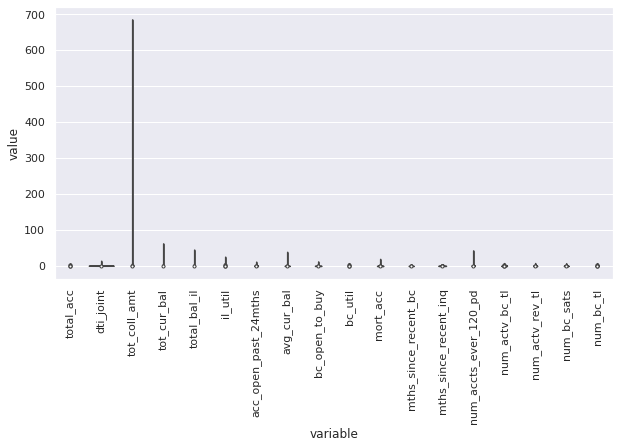

In [ ]:
# fig, ax = plt.subplots(figsize=(10,5))
# a = sns.violinplot(x='variable', y='value', data=pd.melt(train_mid_19_tr.loc[:,np.r_[num_list]]), ax=ax)
# a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [9]:
bins = sc.woebin(train_mid_19_tr, y = 'Default', 
                min_perc_fine_bin=0.01, # How many bins to cut initially into
                min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                stop_limit=0.02, # Minimum information value 
                max_num_bin=8, # Maximum number of bins
                method='tree'
                )

[INFO] creating woe binning ...
Binning on 896430 rows and 20 columns in 00:01:23


{'inq_fi': <Figure size 640x480 with 2 Axes>,
 'tot_cur_bal': <Figure size 640x480 with 2 Axes>,
 'annual_inc_joint': <Figure size 640x480 with 2 Axes>,
 'open_il_12m': <Figure size 640x480 with 2 Axes>,
 'open_rv_24m': <Figure size 640x480 with 2 Axes>,
 'max_bal_bc': <Figure size 640x480 with 2 Axes>,
 'total_acc': <Figure size 640x480 with 2 Axes>,
 'il_util': <Figure size 640x480 with 2 Axes>,
 'total_cu_tl': <Figure size 640x480 with 2 Axes>,
 'total_bal_il': <Figure size 640x480 with 2 Axes>,
 'open_rv_12m': <Figure size 640x480 with 2 Axes>,
 'dti_joint': <Figure size 640x480 with 2 Axes>,
 'all_util': <Figure size 640x480 with 2 Axes>,
 'tot_coll_amt': <Figure size 640x480 with 2 Axes>,
 'revol_util': <Figure size 640x480 with 2 Axes>,
 'open_il_24m': <Figure size 640x480 with 2 Axes>,
 'open_acc_6m': <Figure size 640x480 with 2 Axes>,
 'open_act_il': <Figure size 640x480 with 2 Axes>,
 'application_type': <Figure size 640x480 with 2 Axes>}

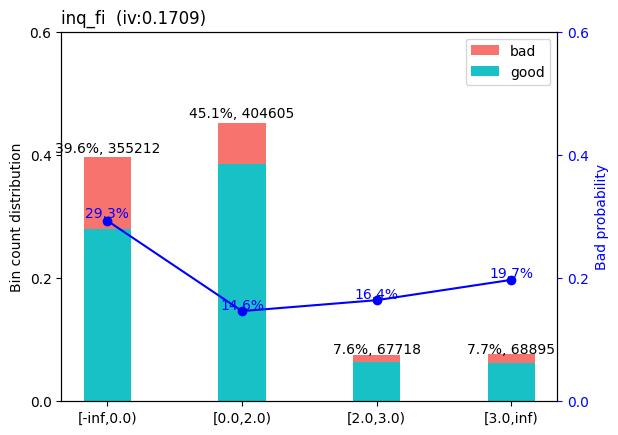

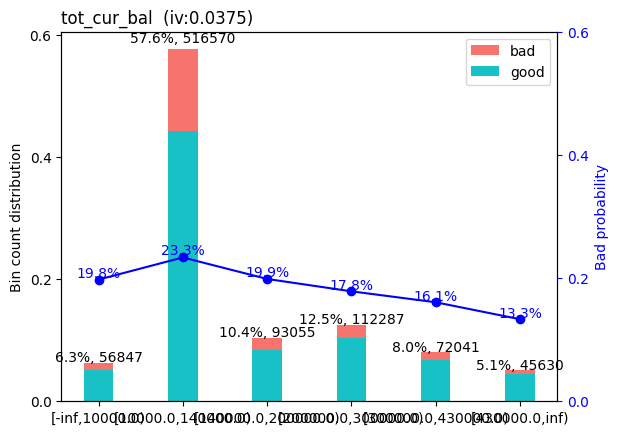

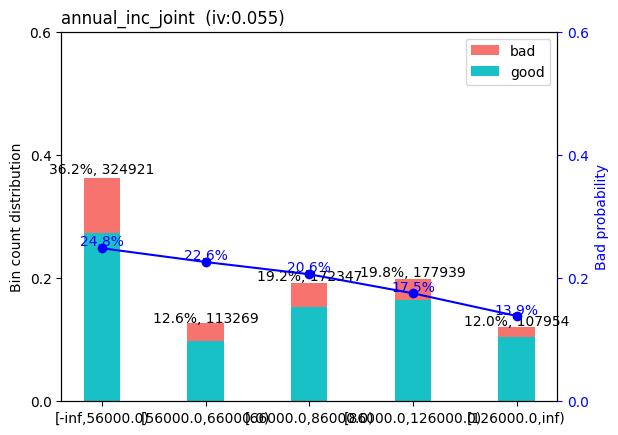

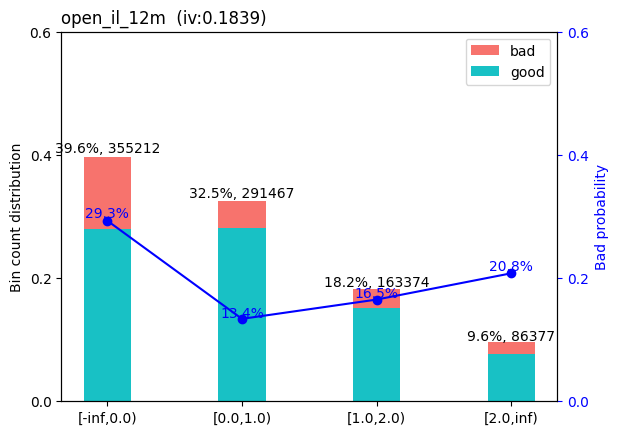

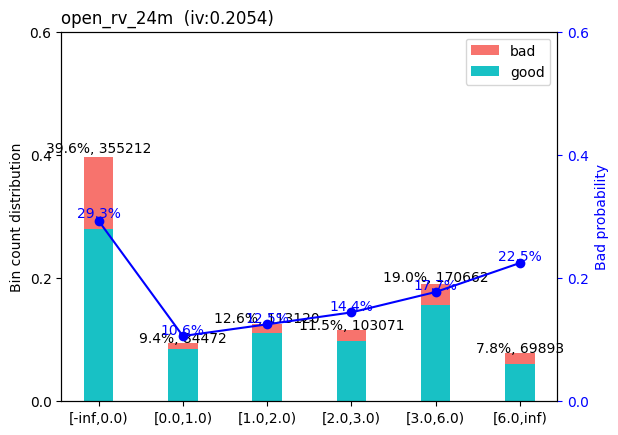

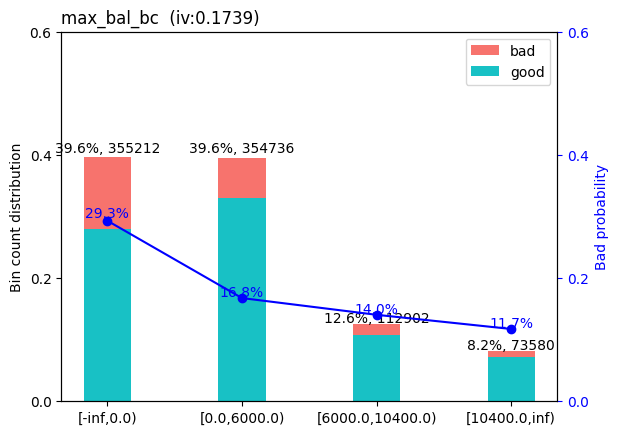

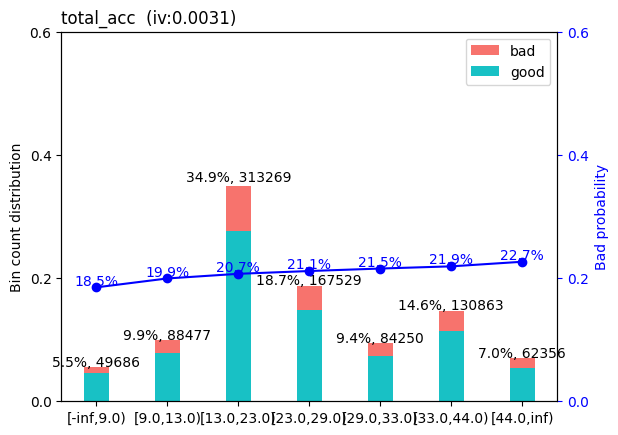

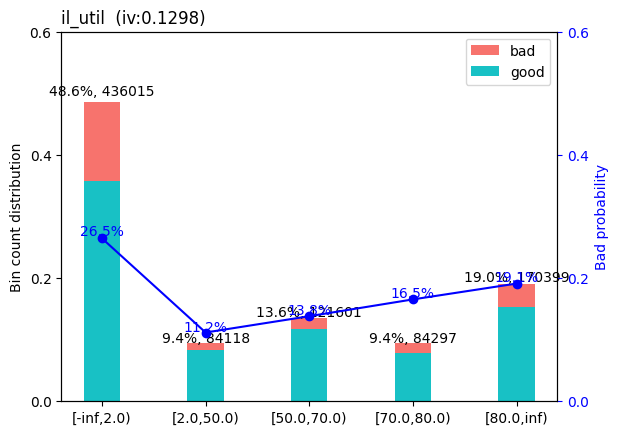

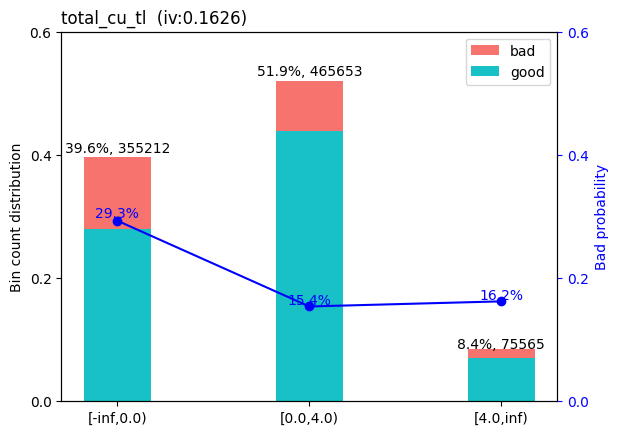

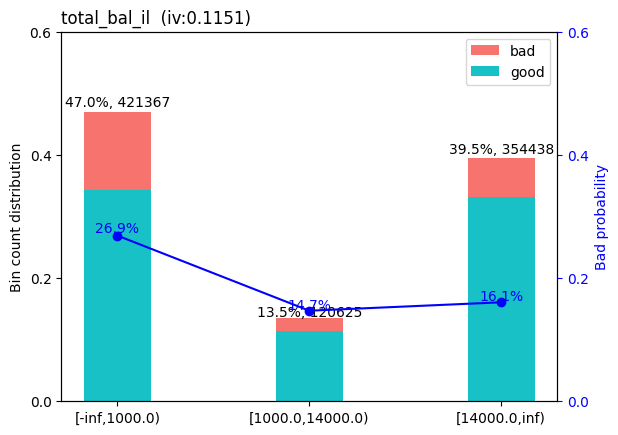

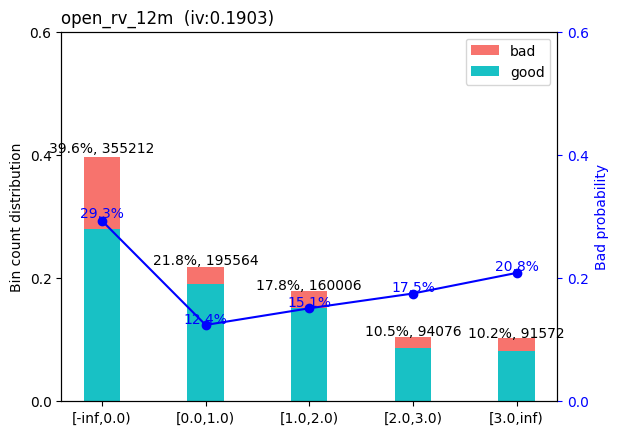

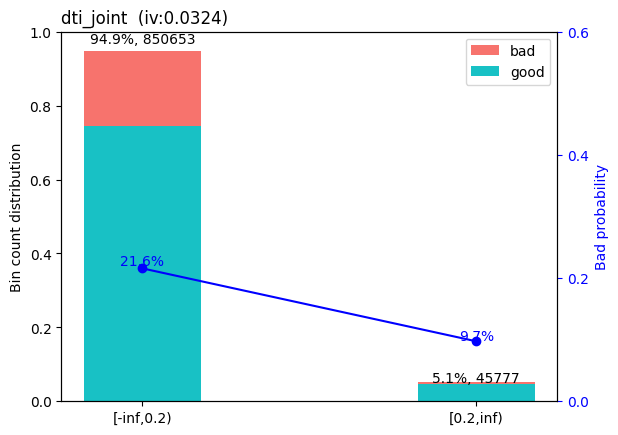

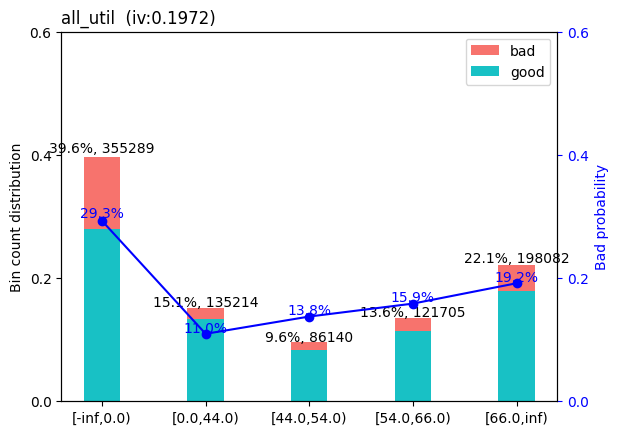

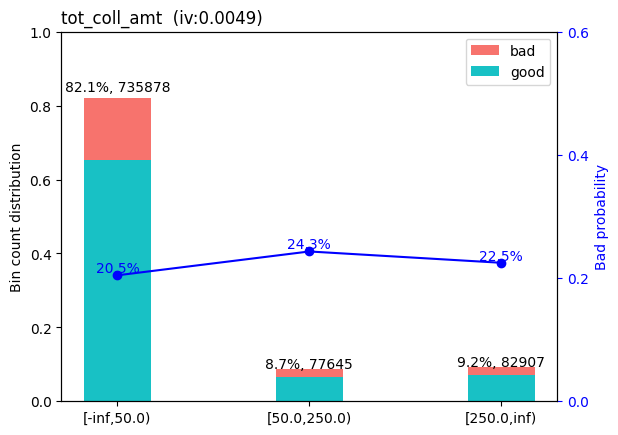

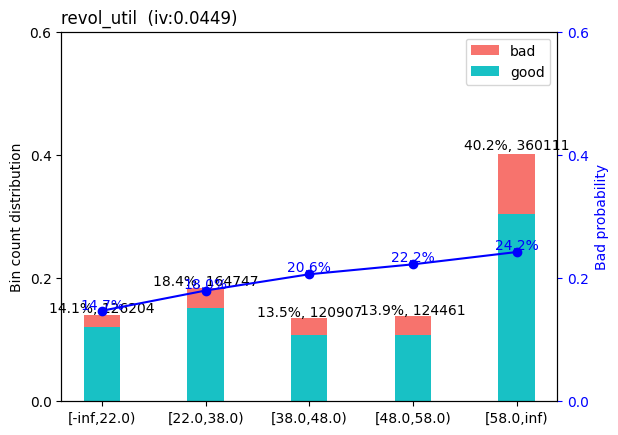

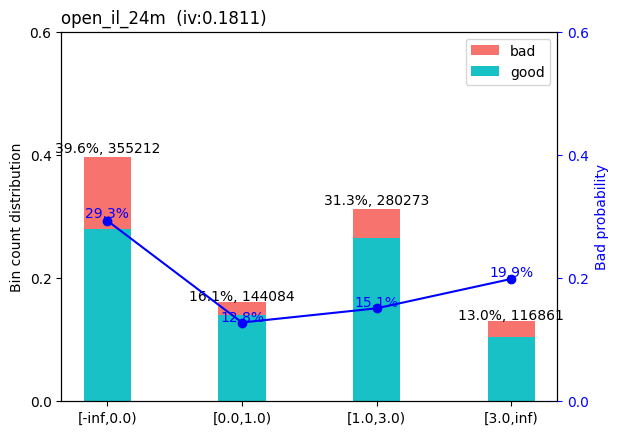

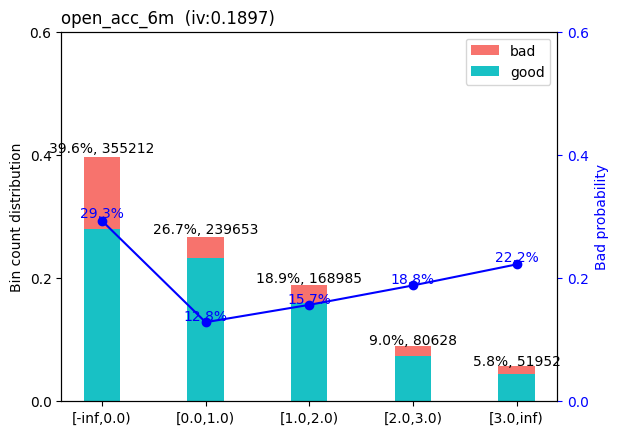

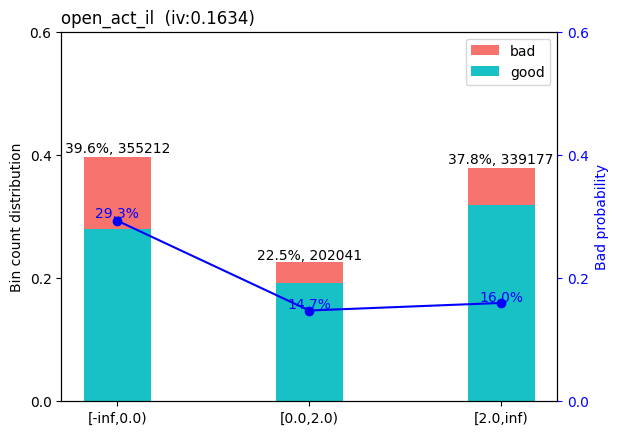

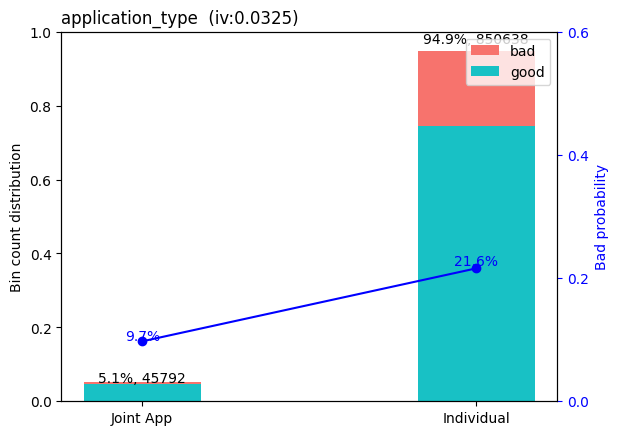

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sc.woebin_plot(bins)

-------- 1/19 inq_fi --------
>>> dt[inq_fi].describe(): 
count    896430.000000
mean          0.227585
std           1.537207
min          -1.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max          15.000000
Name: inq_fi, dtype: float64 



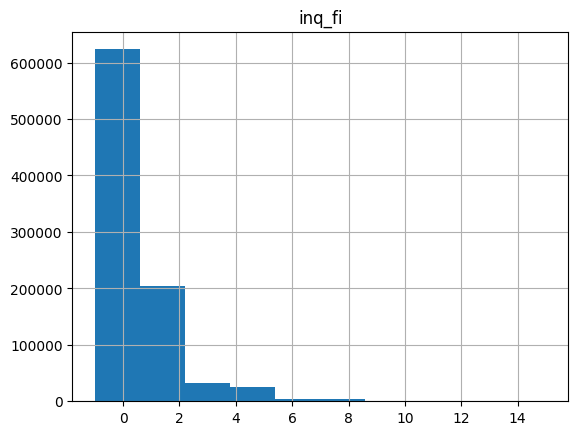

>>> Current breaks:
0.0,2.0,3.0 



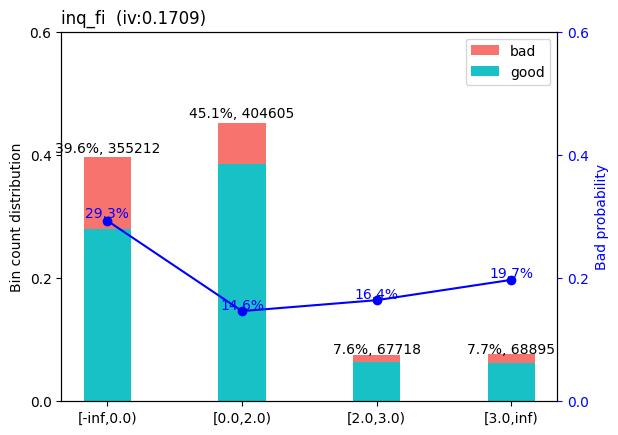

>>> Adjust breaks for (1/19) inq_fi?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/19 tot_cur_bal --------
>>> dt[tot_cur_bal].describe(): 
count     896430.000000
mean      139207.284814
std       149623.563069
min            0.000000
25%        29689.000000
50%        82581.000000
75%       204086.000000
max      1000000.000000
Name: tot_cur_bal, dtype: float64 



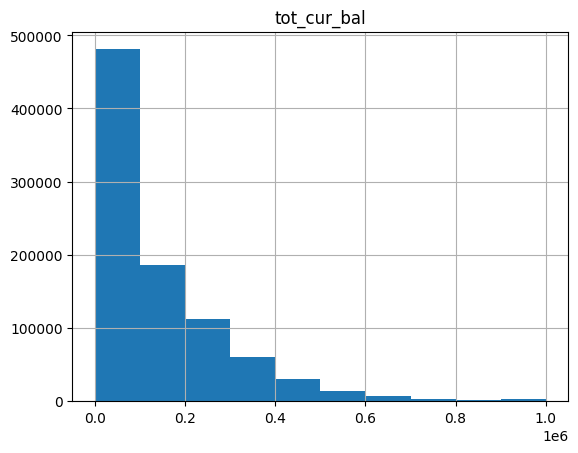

>>> Current breaks:
10000.0,140000.0,200000.0,300000.0,430000.0 



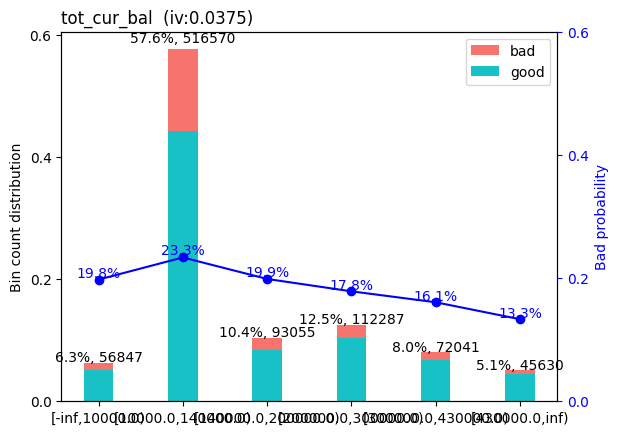

>>> Adjust breaks for (2/19) tot_cur_bal?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 90000.0,140000.0,200000.0,300000.0,430000.0
[INFO] creating woe binning ...
>>> Current breaks:
140000.0, 300000.0, 430000.0, 90000.0, 200000.0 



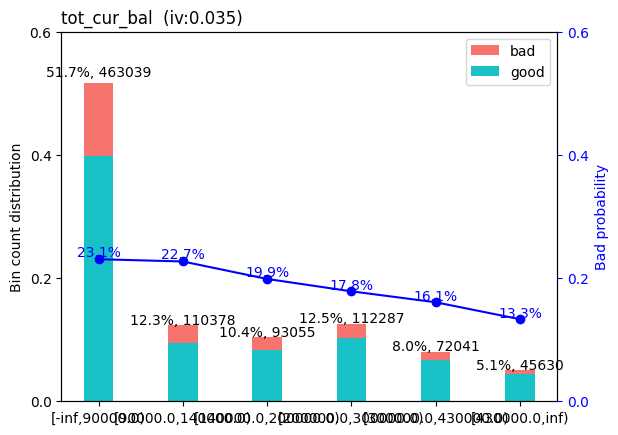

>>> Adjust breaks for (2/19) tot_cur_bal?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/19 annual_inc_joint --------
>>> dt[annual_inc_joint].describe(): 
count    896430.000000
mean      79638.858986
std       51561.052658
min        2400.000000
25%       48000.000000
50%       67600.000000
75%       96000.000000
max      500000.000000
Name: annual_inc_joint, dtype: float64 



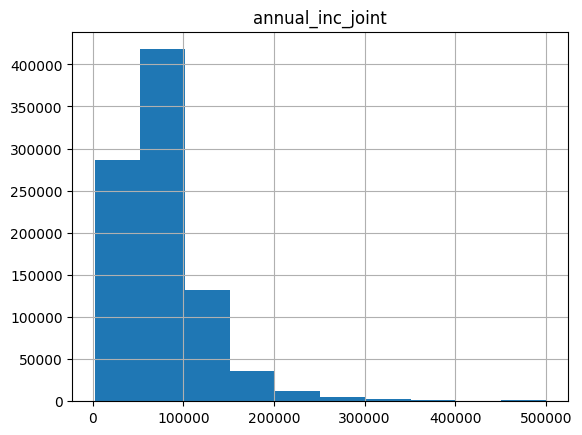

>>> Current breaks:
56000.0,66000.0,86000.0,126000.0 



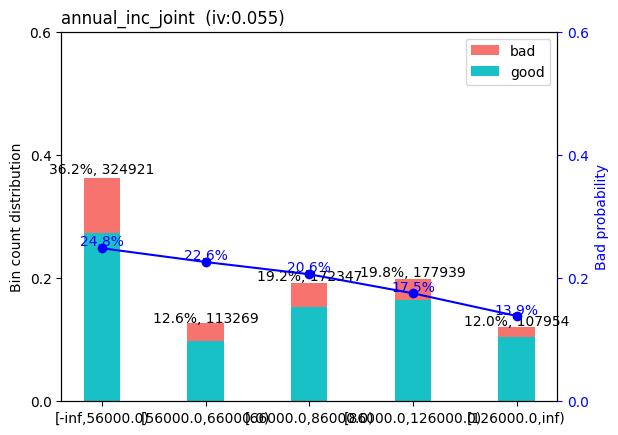

>>> Adjust breaks for (3/19) annual_inc_joint?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/19 open_il_12m --------
>>> dt[open_il_12m].describe(): 
count    896430.000000
mean          0.020758
std           1.100953
min          -1.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max          10.000000
Name: open_il_12m, dtype: float64 



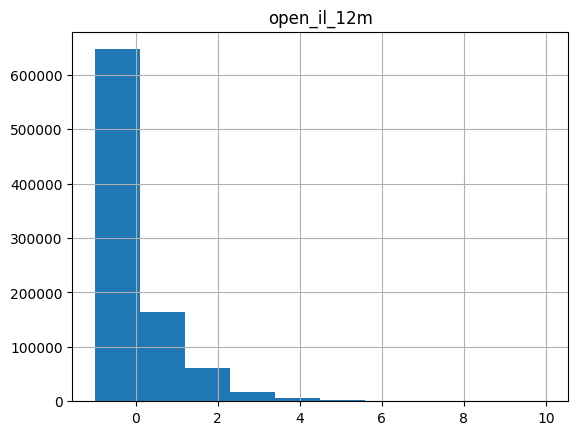

>>> Current breaks:
0.0,1.0,2.0 



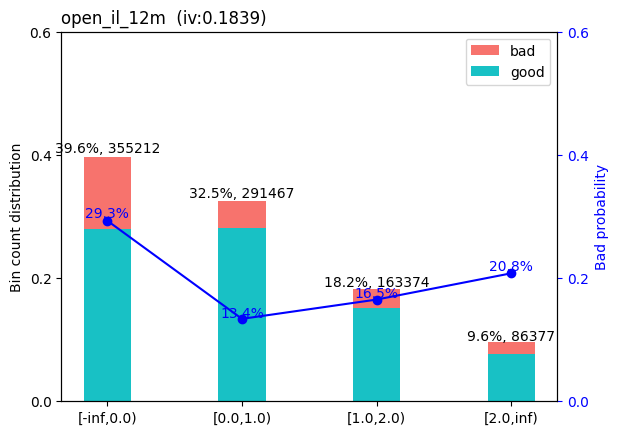

>>> Adjust breaks for (4/19) open_il_12m?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/19 open_rv_24m --------
>>> dt[open_rv_24m].describe(): 
count    896430.000000
mean          1.297211
std           2.749478
min          -1.000000
25%          -1.000000
50%           1.000000
75%           3.000000
max          20.000000
Name: open_rv_24m, dtype: float64 



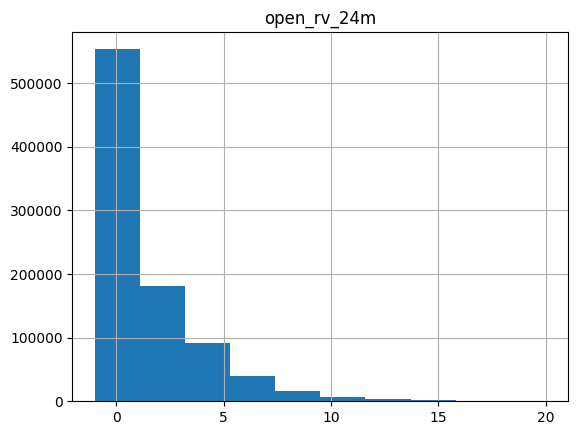

>>> Current breaks:
0.0,1.0,2.0,3.0,6.0 



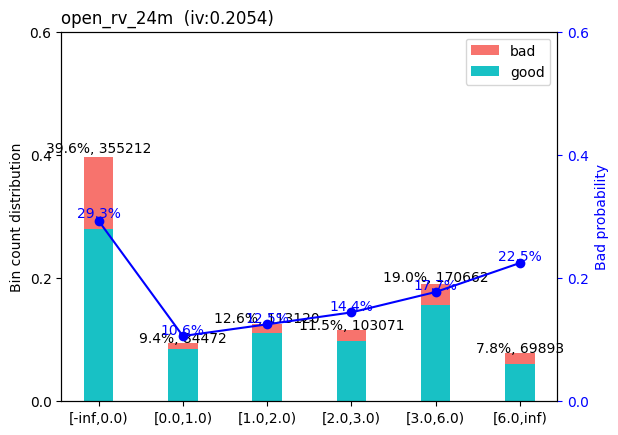

>>> Adjust breaks for (5/19) open_rv_24m?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/19 max_bal_bc --------
>>> dt[max_bal_bc].describe(): 
count    896430.000000
mean       3466.447135
std        5047.555588
min          -1.000000
25%          -1.000000
50%        1639.000000
75%        5160.000000
max      150000.000000
Name: max_bal_bc, dtype: float64 



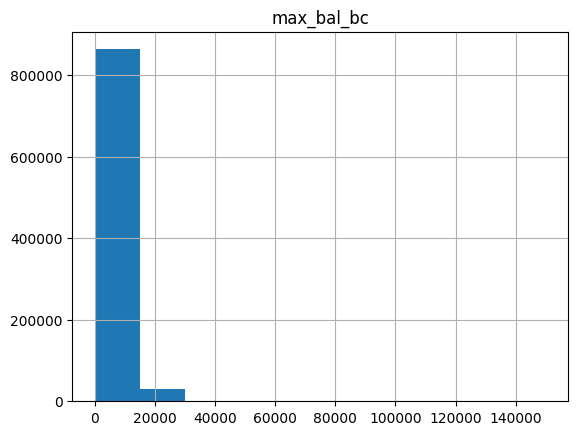

>>> Current breaks:
0.0,6000.0,10400.0 



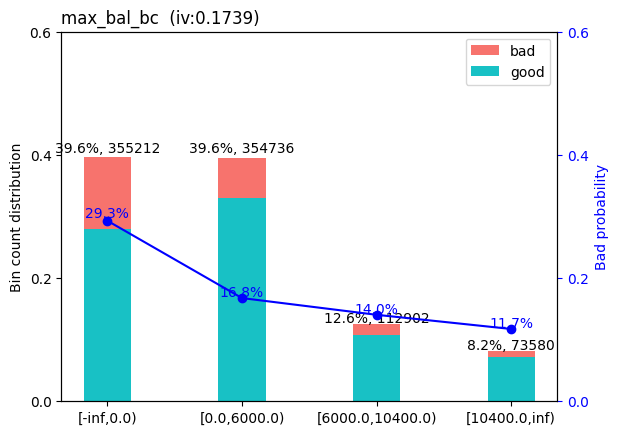

>>> Adjust breaks for (6/19) max_bal_bc?
1: next 
2: yes 
3: back
Selection: 1
-------- 7/19 total_acc --------
>>> dt[total_acc].describe(): 
count    896430.000000
mean         24.209488
std          11.994220
min           2.000000
25%          15.000000
50%          22.000000
75%          31.000000
max         125.000000
Name: total_acc, dtype: float64 



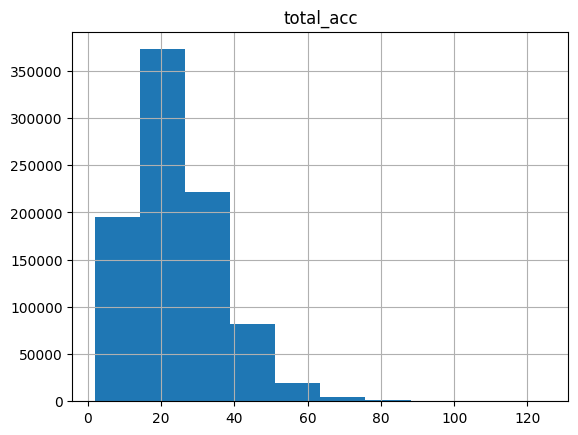

>>> Current breaks:
9.0,13.0,23.0,29.0,33.0,44.0 



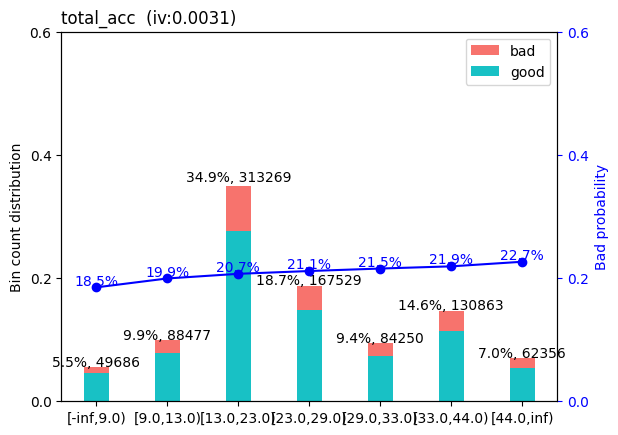

>>> Adjust breaks for (7/19) total_acc?
1: next 
2: yes 
3: back
Selection: 1
-------- 8/19 il_util --------
>>> dt[il_util].describe(): 
count    896430.000000
mean         35.448402
std          39.137887
min          -1.000000
25%          -1.000000
50%          19.000000
75%          73.000000
max         400.000000
Name: il_util, dtype: float64 



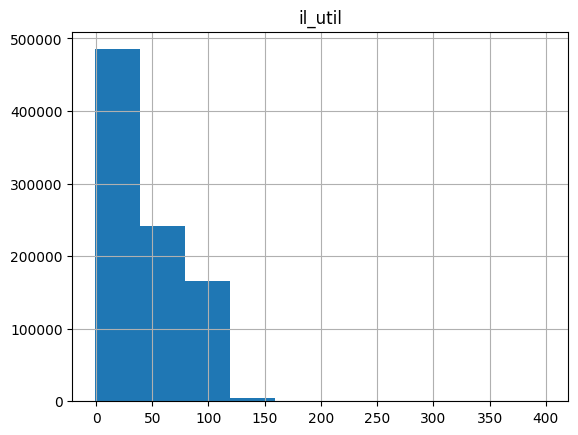

>>> Current breaks:
2.0,50.0,70.0,80.0 



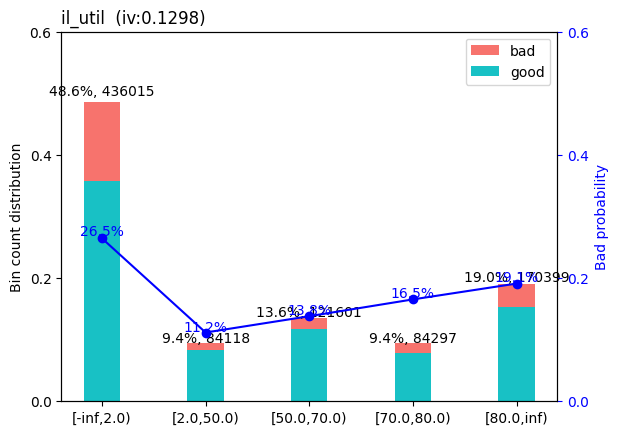

>>> Adjust breaks for (8/19) il_util?
1: next 
2: yes 
3: back
Selection: 1
-------- 9/19 total_cu_tl --------
>>> dt[total_cu_tl].describe(): 
count    896430.000000
mean          0.498114
std           2.403385
min          -1.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max          40.000000
Name: total_cu_tl, dtype: float64 



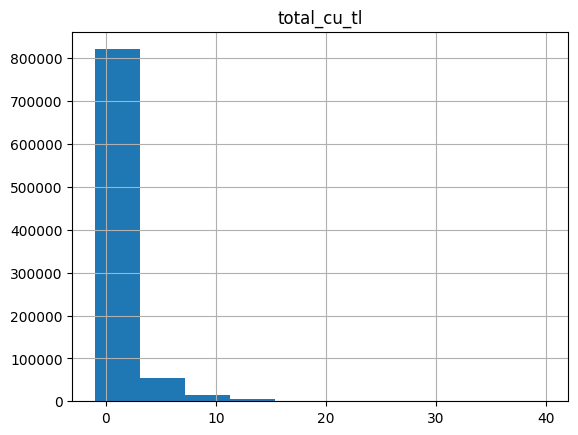

>>> Current breaks:
0.0,4.0 



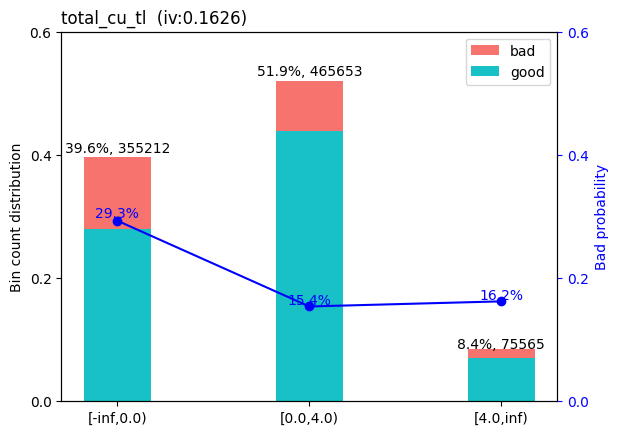

>>> Adjust breaks for (9/19) total_cu_tl?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0, 2
[INFO] creating woe binning ...
>>> Current breaks:
0.0, 2.0 



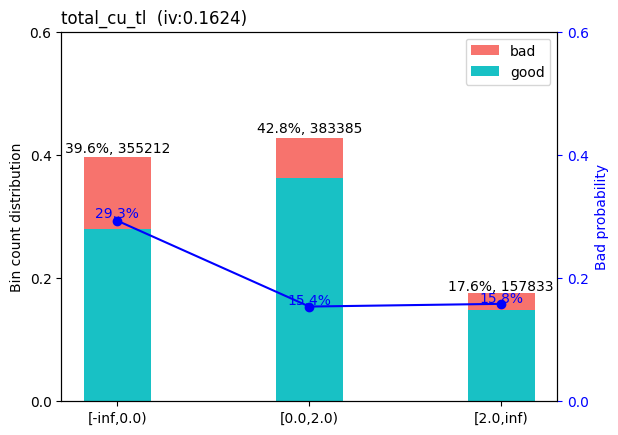

>>> Adjust breaks for (9/19) total_cu_tl?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0,1,2,4
[INFO] creating woe binning ...
>>> Current breaks:
0.0, 2.0, 1.0, 4.0 



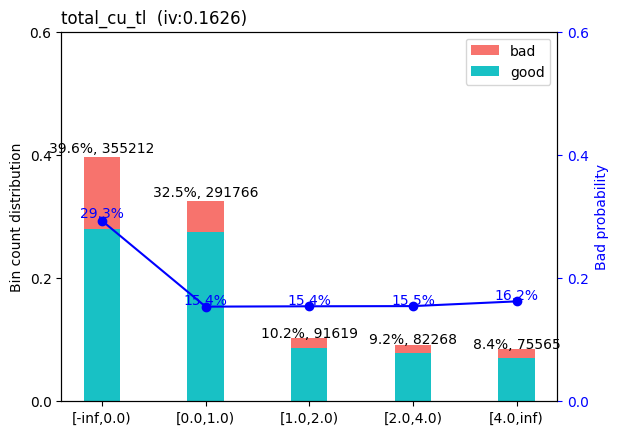

>>> Adjust breaks for (9/19) total_cu_tl?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0, 2, 4, 6
[INFO] creating woe binning ...
>>> Current breaks:
0.0, 4.0, 2.0, 6.0 



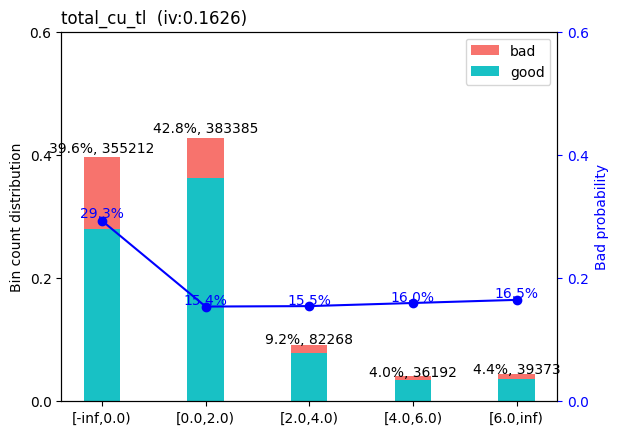

>>> Adjust breaks for (9/19) total_cu_tl?
1: next 
2: yes 
3: back
Selection: 1
-------- 10/19 total_bal_il --------
>>> dt[total_bal_il].describe(): 
count    896430.000000
mean      21457.350817
std       38241.470197
min           0.000000
25%           0.000000
50%        4357.000000
75%       29323.000000
max      800000.000000
Name: total_bal_il, dtype: float64 



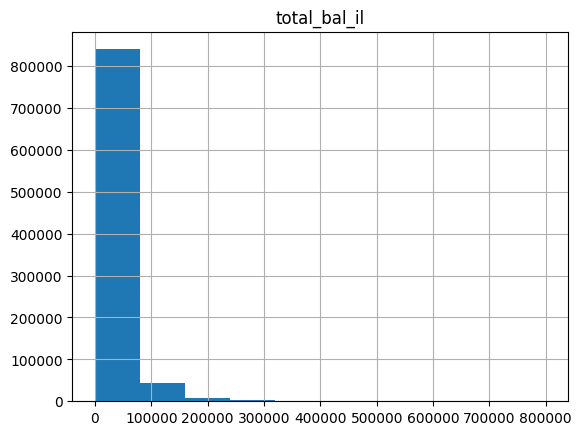

>>> Current breaks:
1000.0,14000.0 



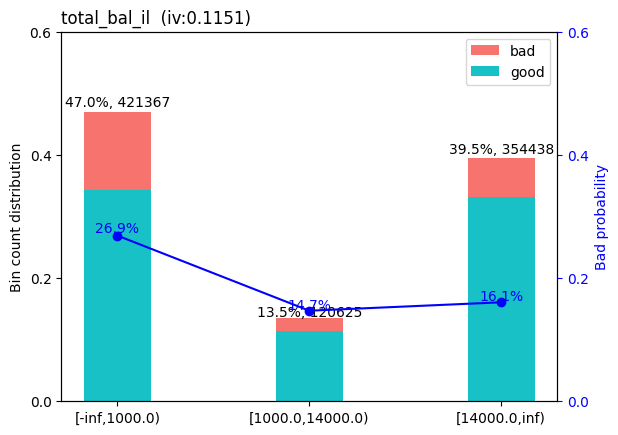

>>> Adjust breaks for (10/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0
[INFO] creating woe binning ...
>>> Current breaks:
 



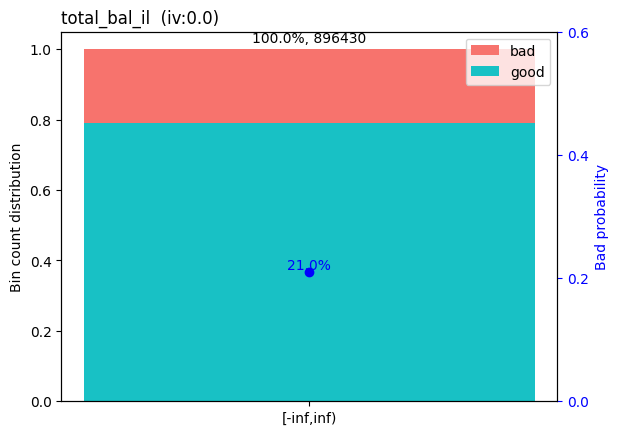

>>> Adjust breaks for (10/19) total_bal_il?
1: next 
2: yes 
3: back
Selection: 1
-------- 11/19 open_rv_12m --------
>>> dt[open_rv_12m].describe(): 
count    896430.000000
mean          0.397640
std           1.626829
min          -1.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max          10.000000
Name: open_rv_12m, dtype: float64 



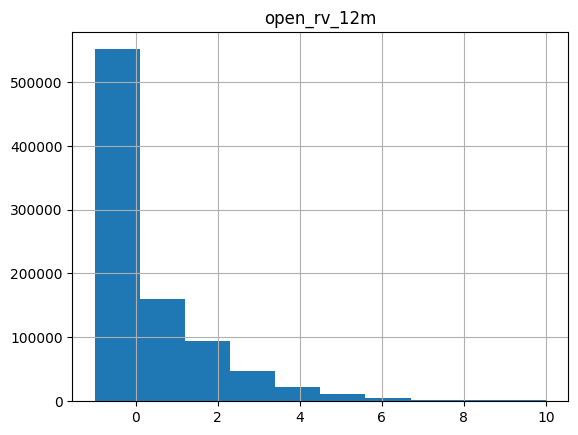

>>> Current breaks:
0.0,1.0,2.0,3.0 



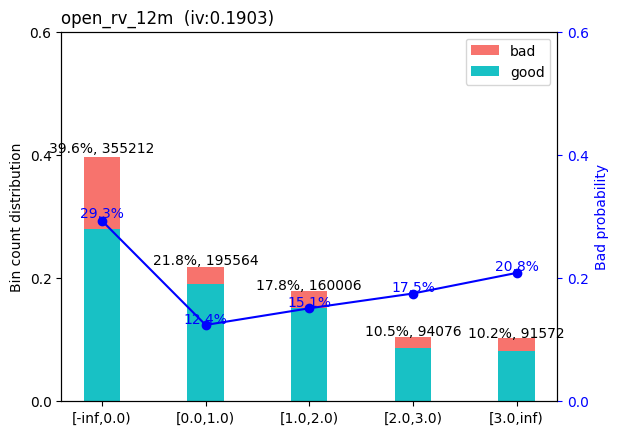

>>> Adjust breaks for (11/19) open_rv_12m?
1: next 
2: yes 
3: back
Selection: 1
-------- 12/19 dti_joint --------
>>> dt[dti_joint].describe(): 
count    896430.000000
mean          0.988297
std           4.611159
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          40.000000
Name: dti_joint, dtype: float64 



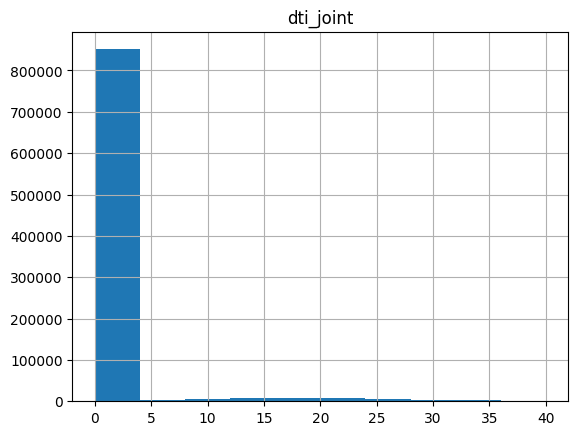

>>> Current breaks:
0.2 



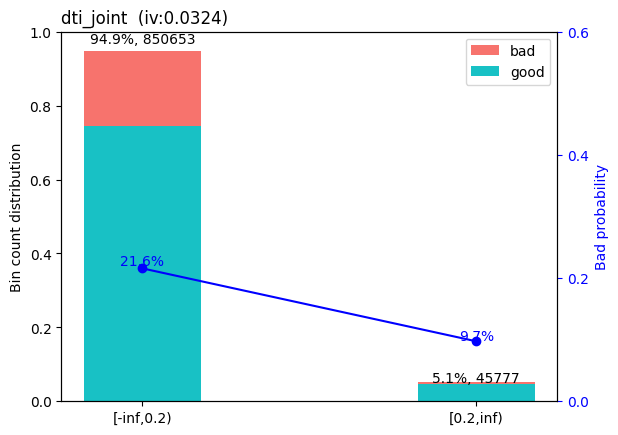

>>> Adjust breaks for (12/19) dti_joint?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0.2, 0.8
[INFO] creating woe binning ...
>>> Current breaks:
0.2, 0.8 



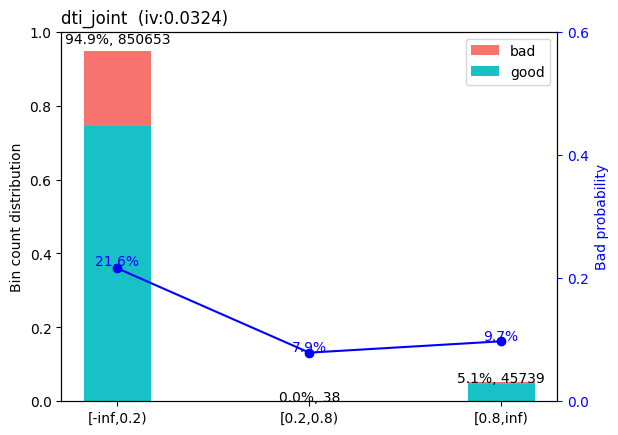

>>> Adjust breaks for (12/19) dti_joint?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0.2
[INFO] creating woe binning ...
>>> Current breaks:
0.2 



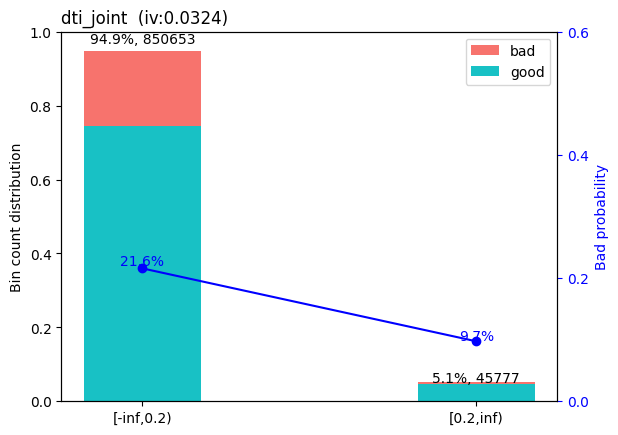

>>> Adjust breaks for (12/19) dti_joint?
1: next 
2: yes 
3: back
Selection: 1
-------- 13/19 all_util --------
>>> dt[all_util].describe(): 
count    896430.000000
mean         34.264613
std          32.859370
min          -1.000000
25%          -1.000000
50%          37.000000
75%          63.000000
max         200.000000
Name: all_util, dtype: float64 



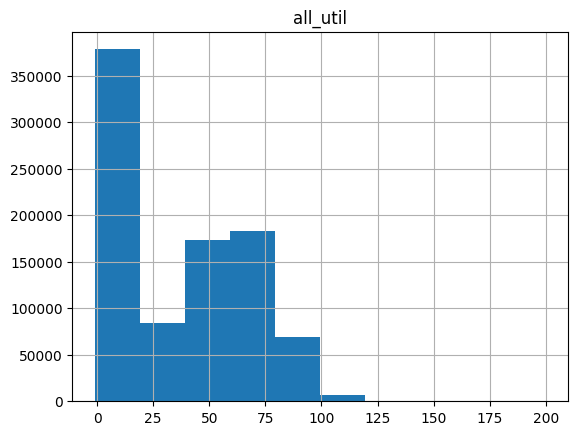

>>> Current breaks:
0.0,44.0,54.0,66.0 



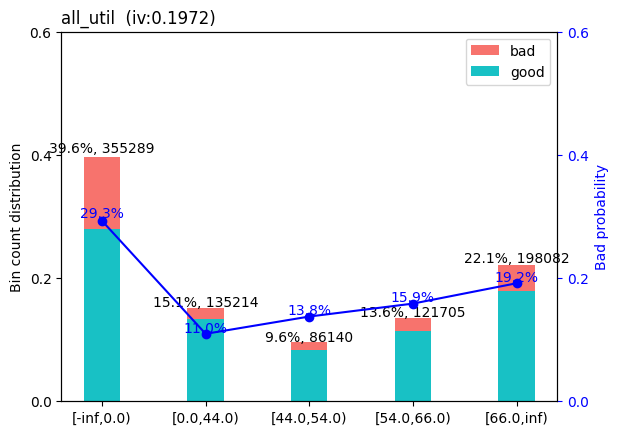

>>> Adjust breaks for (13/19) all_util?
1: next 
2: yes 
3: back
Selection: 1
-------- 14/19 tot_coll_amt --------
>>> dt[tot_coll_amt].describe(): 
count    896430.000000
mean        222.746551
std        1810.454524
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      500000.000000
Name: tot_coll_amt, dtype: float64 



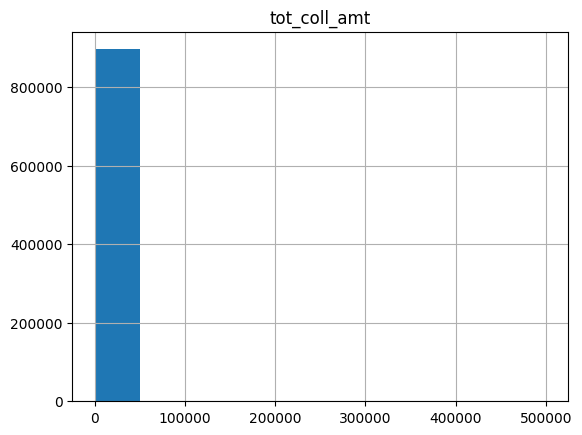

>>> Current breaks:
50.0,250.0 



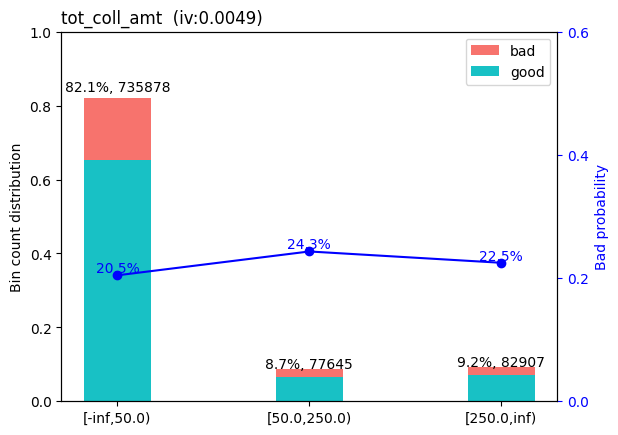

>>> Adjust breaks for (14/19) tot_coll_amt?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 40, 210
[INFO] creating woe binning ...
>>> Current breaks:
40.0, 210.0 



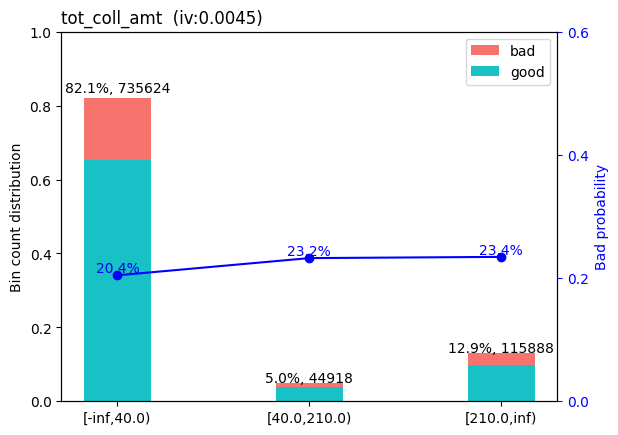

>>> Adjust breaks for (14/19) tot_coll_amt?
1: next 
2: yes 
3: back
Selection: 1
-------- 15/19 revol_util --------
>>> dt[revol_util].describe(): 
count    896430.000000
mean         50.791429
std          24.654047
min           0.000000
25%          32.100000
50%          50.800000
75%          69.800000
max         200.000000
Name: revol_util, dtype: float64 



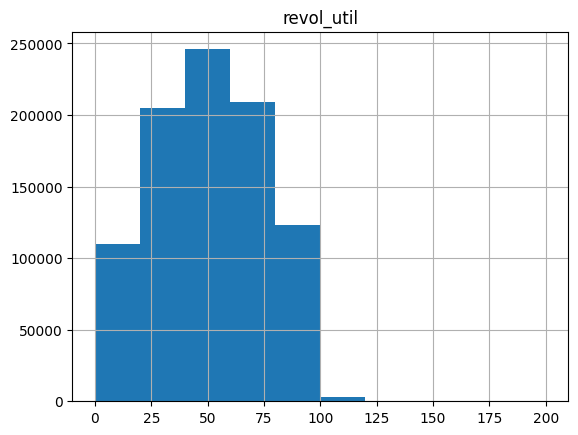

>>> Current breaks:
22.0,38.0,48.0,58.0 



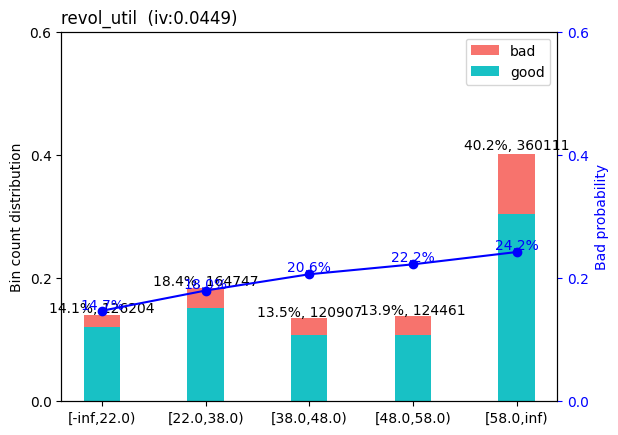

>>> Adjust breaks for (15/19) revol_util?
1: next 
2: yes 
3: back
Selection: 1
-------- 16/19 open_il_24m --------
>>> dt[open_il_24m].describe(): 
count    896430.000000
mean          0.563101
std           1.772167
min          -1.000000
25%          -1.000000
50%           0.000000
75%           2.000000
max          20.000000
Name: open_il_24m, dtype: float64 



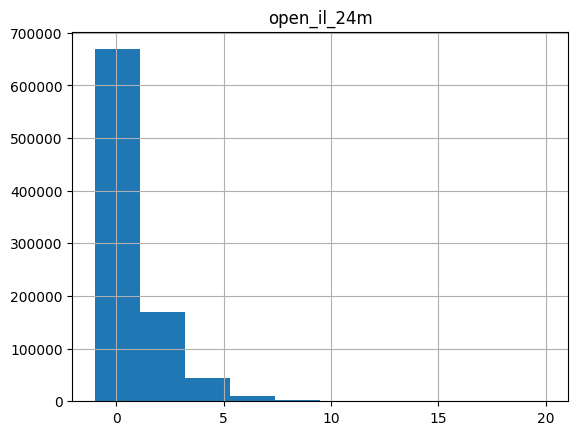

>>> Current breaks:
0.0,1.0,3.0 



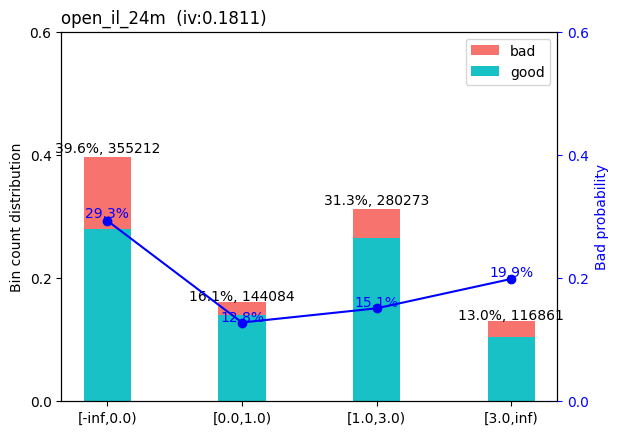

>>> Adjust breaks for (16/19) open_il_24m?
1: next 
2: yes 
3: back
Selection: 1
-------- 17/19 open_acc_6m --------
>>> dt[open_acc_6m].describe(): 
count    896430.000000
mean          0.180968
std           1.312453
min          -1.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max          10.000000
Name: open_acc_6m, dtype: float64 



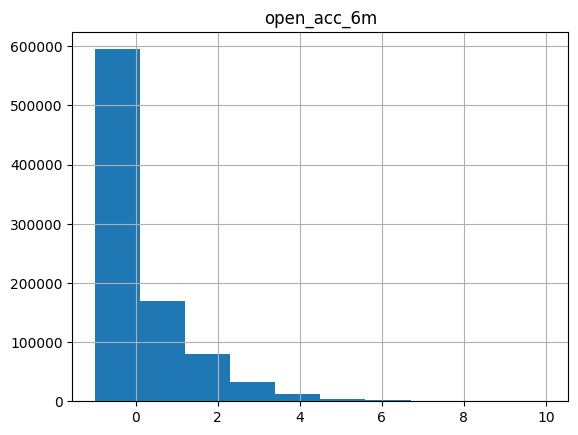

>>> Current breaks:
0.0,1.0,2.0,3.0 



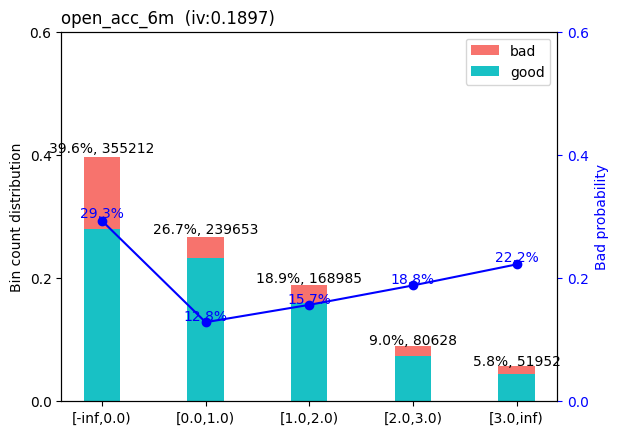

>>> Adjust breaks for (17/19) open_acc_6m?
1: next 
2: yes 
3: back
Selection: 1
-------- 18/19 open_act_il --------
>>> dt[open_act_il].describe(): 
count    896430.000000
mean          1.284008
std           2.978119
min          -1.000000
25%          -1.000000
50%           1.000000
75%           2.000000
max          40.000000
Name: open_act_il, dtype: float64 



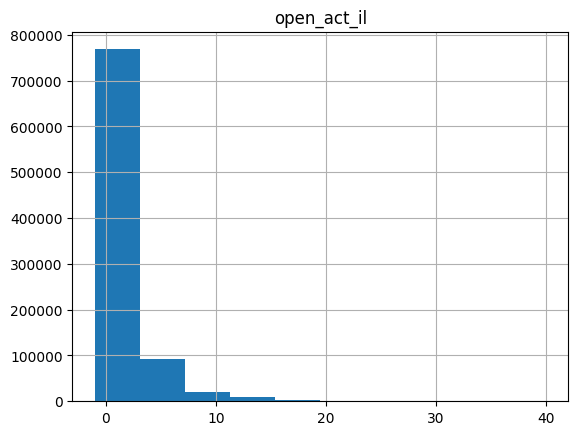

>>> Current breaks:
0.0,2.0 



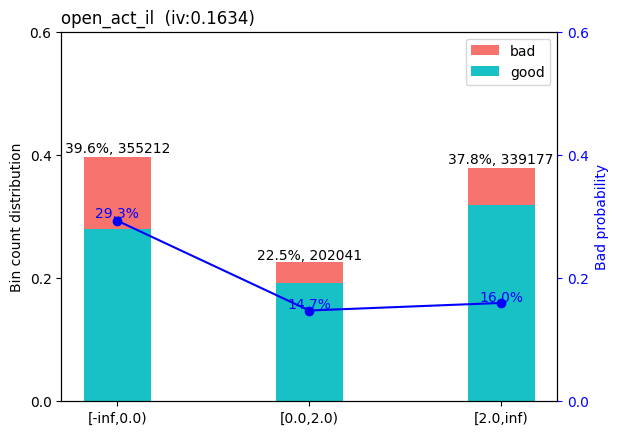

>>> Adjust breaks for (18/19) open_act_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0,1,2,4,10
[INFO] creating woe binning ...
>>> Current breaks:
2.0, 1.0, 0.0, 4.0, 10.0 



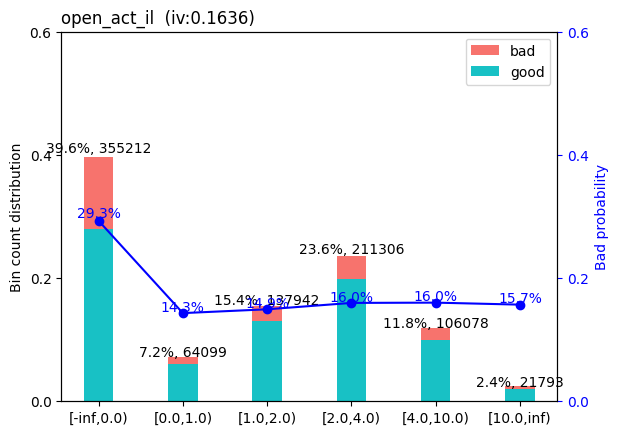

>>> Adjust breaks for (18/19) open_act_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0, 1, 2, 4
[INFO] creating woe binning ...
>>> Current breaks:
0.0, 2.0, 1.0, 4.0 



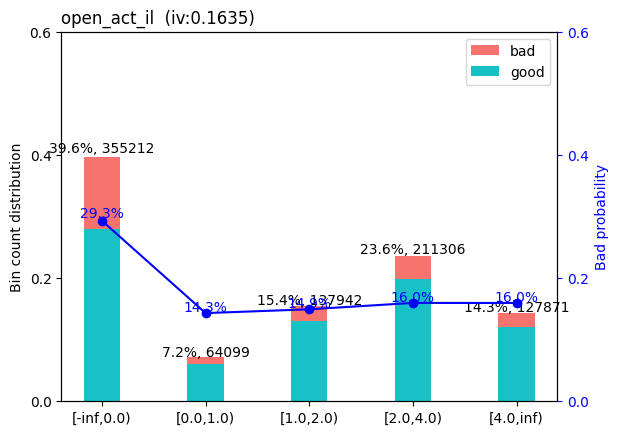

>>> Adjust breaks for (18/19) open_act_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0, 1, 2, 5
[INFO] creating woe binning ...
>>> Current breaks:
0.0, 2.0, 1.0, 5.0 



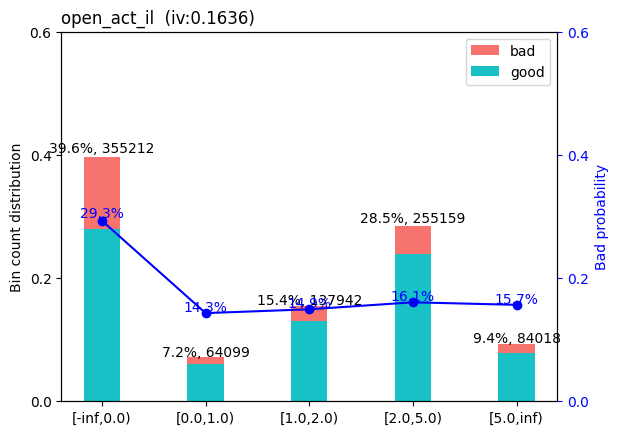

>>> Adjust breaks for (18/19) open_act_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0,1, 2, 4
[INFO] creating woe binning ...
>>> Current breaks:
0.0, 2.0, 1.0, 4.0 



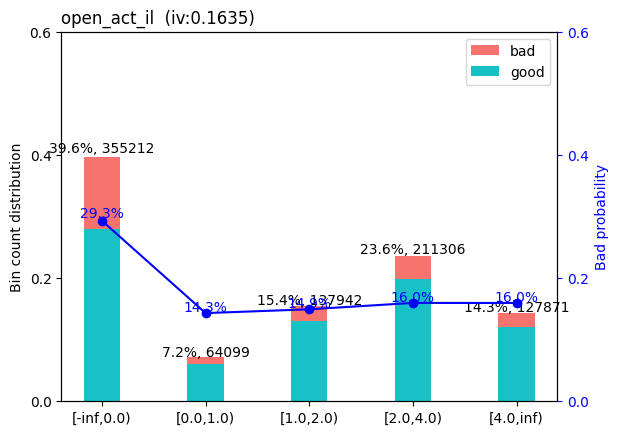

>>> Adjust breaks for (18/19) open_act_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0,1,2,3
[INFO] creating woe binning ...
>>> Current breaks:
3.0, 2.0, 1.0, 0.0 



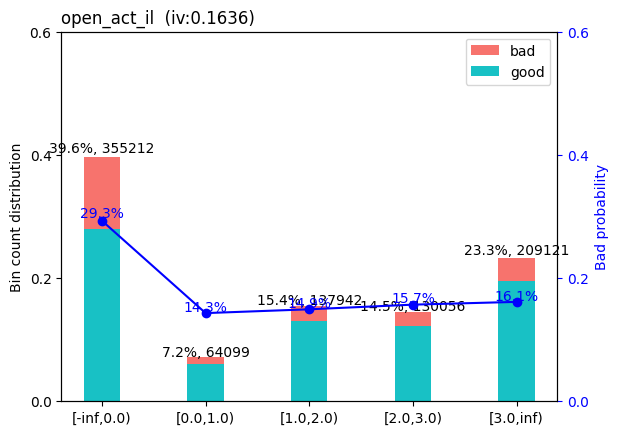

>>> Adjust breaks for (18/19) open_act_il?
1: next 
2: yes 
3: back
Selection: 1
-------- 19/19 application_type --------
>>> dt[application_type].describe(): 
count         896430
unique             2
top       Individual
freq          850638
Name: application_type, dtype: object 

>>> dt[application_type].value_counts(): 
Individual    850638
Joint App      45792
Name: application_type, dtype: int64 

>>> Current breaks:
'Joint App','Individual' 



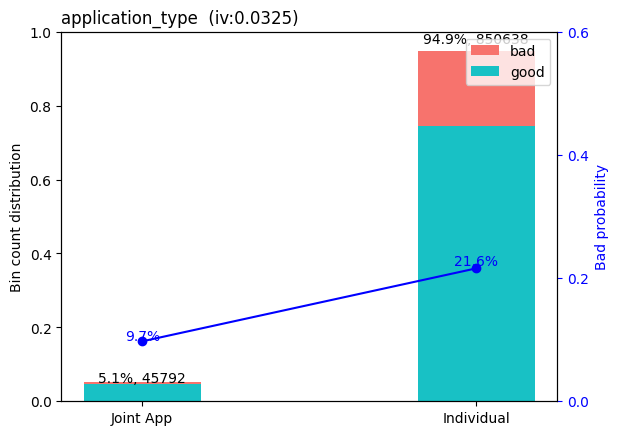

>>> Adjust breaks for (19/19) application_type?
1: next 
2: yes 
3: back
Selection: 1


In [11]:
breaks_adj = sc.woebin_adj(train_mid_19_tr, "Default", bins, adj_all_var=True)

In [12]:
print(breaks_adj)

{'all_util': [0.0,44.0,54.0,66.0], 'annual_inc_joint': [56000.0,66000.0,86000.0,126000.0], 'application_type': ['Joint App','Individual'], 'dti_joint': [0.2], 'il_util': [2.0,50.0,70.0,80.0], 'inq_fi': [0.0,2.0,3.0], 'max_bal_bc': [0.0,6000.0,10400.0], 'open_acc_6m': [0.0,1.0,2.0,3.0], 'open_act_il': [0,1,2,3], 'open_il_12m': [0.0,1.0,2.0], 'open_il_24m': [0.0,1.0,3.0], 'open_rv_12m': [0.0,1.0,2.0,3.0], 'open_rv_24m': [0.0,1.0,2.0,3.0,6.0], 'revol_util': [22.0,38.0,48.0,58.0], 'tot_coll_amt': [40, 210], 'tot_cur_bal': [90000.0,140000.0,200000.0,300000.0,430000.0], 'total_acc': [9.0,13.0,23.0,29.0,33.0,44.0], 'total_bal_il': [0], 'total_cu_tl': [0, 2, 4, 6]}
